#### INSURANCE FRAUD CLAIM DETECTION 

In [1]:
# Load the Required Libraries:
import pandas as pd #(To read the data)
import numpy as np #(To perform mathematical calculations)
import matplotlib.pyplot as plt #(For Visualizations)
import seaborn as sns #(For Visualizations)
from sklearn.impute import SimpleImputer #(For imputation)

In [2]:
# Reading the Train Data:
# Reading Train_Demographics data:
TD_data1 = pd.read_csv('Train_Demographics.csv', na_values="NA")

In [3]:
# Observing the top 5 records of data1:
TD_data1.head()

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
0,Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India
1,Cust10001,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India
2,Cust10002,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India
3,Cust10003,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India
4,Cust10004,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India


In [4]:
# Observing No of rows and columns in data1:
TD_data1.shape

(28836, 10)

In [5]:
# Observing the data types in data1:
TD_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CustomerID             28836 non-null  object
 1   InsuredAge             28836 non-null  int64 
 2   InsuredZipCode         28836 non-null  int64 
 3   InsuredGender          28806 non-null  object
 4   InsuredEducationLevel  28836 non-null  object
 5   InsuredOccupation      28836 non-null  object
 6   InsuredHobbies         28836 non-null  object
 7   CapitalGains           28836 non-null  int64 
 8   CapitalLoss            28836 non-null  int64 
 9   Country                28834 non-null  object
dtypes: int64(4), object(6)
memory usage: 2.2+ MB


In [6]:
# Checking null values in data1:
TD_data1.isnull().sum()

CustomerID                0
InsuredAge                0
InsuredZipCode            0
InsuredGender            30
InsuredEducationLevel     0
InsuredOccupation         0
InsuredHobbies            0
CapitalGains              0
CapitalLoss               0
Country                   2
dtype: int64

In [7]:
# Checking the summary statistics of the data:
TD_data1.describe()

,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss
count,28836.000000,28836.000000,28836.000000,28836.000000
mean,38.815370,502436.579068,23066.569566,-24940.612429
std,7.996377,72250.868871,27637.813724,27913.209608
min,19.000000,430104.000000,0.000000,-111100.000000
25%,33.000000,448603.000000,0.000000,-50000.000000
50%,38.000000,466691.000000,0.000000,0.000000
75%,44.000000,603848.000000,49000.000000,0.000000
max,64.000000,620962.000000,100500.000000,0.000000


In [8]:
# Creating a list of numerical and categorical attributes:
num_cols = ["InsuredAge", "InsuredZipCode", "CapitalGains", "CapitalLoss"]
cat_cols = ["CustomerID", "InsuredGender", "InsuredEducationLevel", "InsuredOccupation", "InsuredHobbies", "Country"]

In [9]:
# Converting object data types to category in data1:
TD_data1[cat_cols] = TD_data1[cat_cols].astype('category')

In [10]:
cat_var=TD_data1.select_dtypes('category').columns

In [11]:
# Checking the datatypes after type conversion:
TD_data1.dtypes

CustomerID               category
InsuredAge                  int64
InsuredZipCode              int64
InsuredGender            category
InsuredEducationLevel    category
InsuredOccupation        category
InsuredHobbies           category
CapitalGains                int64
CapitalLoss                 int64
Country                  category
dtype: object

In [12]:
TD_data1.nunique()

CustomerID               28836
InsuredAge                  46
InsuredZipCode             995
InsuredGender                2
InsuredEducationLevel        7
InsuredOccupation           14
InsuredHobbies              20
CapitalGains               338
CapitalLoss                354
Country                      1
dtype: int64

In [13]:
# Missing values imputation in categorical attributes with 'Most Frequent value':
cat_imputer = SimpleImputer(strategy='most_frequent')
TD_data1[cat_var]=cat_imputer.fit_transform(TD_data1[cat_var])

In [14]:
# Checking the null values after imputation:
TD_data1.isnull().sum()

CustomerID               0
InsuredAge               0
InsuredZipCode           0
InsuredGender            0
InsuredEducationLevel    0
InsuredOccupation        0
InsuredHobbies           0
CapitalGains             0
CapitalLoss              0
Country                  0
dtype: int64

In [15]:
# Checking the unique values:
TD_data1.nunique()

CustomerID               28836
InsuredAge                  46
InsuredZipCode             995
InsuredGender                2
InsuredEducationLevel        7
InsuredOccupation           14
InsuredHobbies              20
CapitalGains               338
CapitalLoss                354
Country                      1
dtype: int64

In [16]:
# Reading Train_Policy data:
TP_data2 = pd.read_csv('Train_Policy.csv', na_values=["NA",-1,"MISSINGVAL"])

In [17]:
# Observing the top 5 records of data2:
TP_data2.head()

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID
0,110122,328,2014-10-17,State3,250/500,1000,1406.91,0,husband,Cust1001
1,110125,256,1990-05-25,State1,250/500,2000,1415.74,6000000,unmarried,Cust1004
2,110126,228,2014-06-06,State1,500/1000,1000,1583.91,6000000,unmarried,Cust1005
3,110127,256,2006-10-12,State3,250/500,1000,1351.10,0,unmarried,Cust1006
4,110128,137,2000-06-04,State2,250/500,1000,1333.35,0,husband,Cust1007


In [18]:
# Observing No of rows and columns in data2:
TP_data2.shape

(28836, 10)

In [19]:
# Observing the data types in data2:
TP_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   InsurancePolicyNumber       28836 non-null  int64  
 1   CustomerLoyaltyPeriod       28836 non-null  int64  
 2   DateOfPolicyCoverage        28836 non-null  object 
 3   InsurancePolicyState        28836 non-null  object 
 4   Policy_CombinedSingleLimit  28836 non-null  object 
 5   Policy_Deductible           28836 non-null  int64  
 6   PolicyAnnualPremium         28695 non-null  float64
 7   UmbrellaLimit               28836 non-null  int64  
 8   InsuredRelationship         28836 non-null  object 
 9   CustomerID                  28836 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.2+ MB


In [20]:
# Checking null values in data2:
TP_data2.isnull().sum()

InsurancePolicyNumber           0
CustomerLoyaltyPeriod           0
DateOfPolicyCoverage            0
InsurancePolicyState            0
Policy_CombinedSingleLimit      0
Policy_Deductible               0
PolicyAnnualPremium           141
UmbrellaLimit                   0
InsuredRelationship             0
CustomerID                      0
dtype: int64

In [21]:
# Checking the summary statistics of the data:
TP_data2.describe()

,InsurancePolicyNumber,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit
count,28836.000000,28836.000000,28836.000000,28695.000000,2.883600e+04
mean,129312.517097,203.067867,1114.282529,1261.702646,9.836680e+05
std,11114.060267,99.932951,546.632816,205.385158,1.969282e+06
min,110122.000000,1.000000,500.000000,436.280000,-1.000000e+06
25%,119698.750000,126.000000,622.000000,1124.425000,0.000000e+00
50%,129278.500000,199.000000,1000.000000,1266.440000,0.000000e+00
75%,138933.250000,267.000000,1627.000000,1397.200000,4.859610e+05
max,148619.000000,479.000000,2000.000000,2047.590000,1.000000e+07


In [22]:
# Creating a list of numerical and categorical attributes:
num_cols = ["InsurancePolicyNumber", "CustomerLoyaltyPeriod", "Policy_Deductible", "PolicyAnnualPremium", "UmbrellaLimit"]
cat_cols = ["CustomerID", "DateOfPolicyCoverage", "InsurancePolicyState", "Policy_CombinedSingleLimit", "InsuredRelationship"]

In [23]:
# Converting object data types to category in data2:
TP_data2[cat_cols] = TP_data2[cat_cols].astype('category')

In [24]:
#TP_data2['DateOfPolicyCoverage']=pd.to_datetime(TP_data2['DateOfPolicyCoverage'])

In [25]:
# Checking the datatypes after type conversion:
TP_data2.dtypes

InsurancePolicyNumber            int64
CustomerLoyaltyPeriod            int64
DateOfPolicyCoverage          category
InsurancePolicyState          category
Policy_CombinedSingleLimit    category
Policy_Deductible                int64
PolicyAnnualPremium            float64
UmbrellaLimit                    int64
InsuredRelationship           category
CustomerID                    category
dtype: object

In [26]:
#coverting num_cols int to float
TP_data2[num_cols] = TP_data2[num_cols].astype('float64')

In [27]:
# imputing policy annual premium using mean data2:
TP_data2[num_cols] = TP_data2[num_cols].fillna(TP_data2[num_cols].median()[0])

In [28]:
# checking null values after imputation:
TP_data2.isnull().sum()

InsurancePolicyNumber         0
CustomerLoyaltyPeriod         0
DateOfPolicyCoverage          0
InsurancePolicyState          0
Policy_CombinedSingleLimit    0
Policy_Deductible             0
PolicyAnnualPremium           0
UmbrellaLimit                 0
InsuredRelationship           0
CustomerID                    0
dtype: int64

In [29]:
# Checking the unique values:
TP_data2.nunique()

InsurancePolicyNumber         28836
CustomerLoyaltyPeriod           479
DateOfPolicyCoverage           6779
InsurancePolicyState              3
Policy_CombinedSingleLimit        9
Policy_Deductible              1496
PolicyAnnualPremium           23852
UmbrellaLimit                  7089
InsuredRelationship               6
CustomerID                    28836
dtype: int64

In [30]:
# Reading Train_Claim data:
TC_data3 = pd.read_csv('Train_Claim.csv', na_values=["?", -5, "MISSINGVALUE", "MISSEDDATA"])

In [31]:
# Observing the top 5 records of data3:
TC_data3.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17.0,3,NaN,1,0.0,NaN,65501.0,13417,6071,46013
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10.0,3,YES,2,1.0,YES,61382.0,15560,5919,39903
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22.0,1,YES,2,3.0,NO,66755.0,11630,11630,43495
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22.0,1,YES,2,3.0,NO,66243.0,12003,12003,42237
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10.0,1,NO,2,1.0,YES,53544.0,8829,7234,37481


In [32]:
# Observing No of rows and columns in data3:
TC_data3.shape

(28836, 19)

In [33]:
# Observing the data types in data3:
TC_data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             28836 non-null  object 
 1   DateOfIncident         28836 non-null  object 
 2   TypeOfIncident         28836 non-null  object 
 3   TypeOfCollission       23674 non-null  object 
 4   SeverityOfIncident     28836 non-null  object 
 5   AuthoritiesContacted   28836 non-null  object 
 6   IncidentState          28836 non-null  object 
 7   IncidentCity           28836 non-null  object 
 8   IncidentAddress        28836 non-null  object 
 9   IncidentTime           28805 non-null  float64
 10  NumberOfVehicles       28836 non-null  int64  
 11  PropertyDamage         18377 non-null  object 
 12  BodilyInjuries         28836 non-null  int64  
 13  Witnesses              28790 non-null  float64
 14  PoliceReport           19031 non-null  object 
 15  Am

In [34]:
# Checking null values in data3:
TC_data3.isnull().sum()

CustomerID                   0
DateOfIncident               0
TypeOfIncident               0
TypeOfCollission          5162
SeverityOfIncident           0
AuthoritiesContacted         0
IncidentState                0
IncidentCity                 0
IncidentAddress              0
IncidentTime                31
NumberOfVehicles             0
PropertyDamage           10459
BodilyInjuries               0
Witnesses                   46
PoliceReport              9805
AmountOfTotalClaim          50
AmountOfInjuryClaim          0
AmountOfPropertyClaim        0
AmountOfVehicleDamage        0
dtype: int64

In [35]:
# Checking the summary statistics of the data3:
TC_data3.describe()

,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
count,28805.000000,28836.000000,28836.000000,28790.00000,28786.000000,28836.000000,28836.000000,28836.000000
mean,11.764069,1.823207,0.985782,1.48826,52308.545473,7337.118428,7283.870197,37687.129387
std,6.148869,0.980099,0.784764,1.04079,25101.172550,4427.638593,4375.842738,17977.048232
min,0.000000,1.000000,0.000000,0.00000,150.000000,0.000000,0.000000,109.000000
25%,6.000000,1.000000,0.000000,1.00000,44643.750000,4743.750000,4862.000000,32193.250000
50%,12.000000,1.000000,1.000000,1.00000,58360.000000,7147.000000,7051.000000,42457.500000
75%,17.000000,3.000000,2.000000,2.00000,68982.750000,10571.250000,10327.000000,49535.750000
max,23.000000,4.000000,2.000000,3.00000,114920.000000,21450.000000,23670.000000,79560.000000


In [36]:
TC_data3.columns

Index(['CustomerID', 'DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'IncidentTime', 'NumberOfVehicles',
       'PropertyDamage', 'BodilyInjuries', 'Witnesses', 'PoliceReport',
       'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage'],
      dtype='object')

In [37]:
num_att = ['IncidentTime','NumberOfVehicles','BodilyInjuries','Witnesses','AmountOfTotalClaim','AmountOfInjuryClaim','AmountOfPropertyClaim','AmountOfVehicleDamage']
categorical = ['CustomerID','DateOfIncident','TypeOfIncident','TypeOfCollission','SeverityOfIncident','AuthoritiesContacted','IncidentState','IncidentCity','IncidentAddress','PropertyDamage','PoliceReport']

In [38]:
# num_att = ['IncidentTime','NumberOfVehicles','BodilyInjuries','Witnesses','AmountOfTotalClaim','AmountOfInjuryClaim','AmountOfPropertyClaim','AmountOfVehicleDamage']
# num_att

In [39]:
categorical = TC_data3.select_dtypes(include = 'object').columns
TC_data3[categorical] = TC_data3[categorical].astype('category')

In [40]:
#categorical

In [41]:
TC_data3[num_att] = TC_data3[num_att].astype('float64')

In [42]:
TC_data3.dtypes

CustomerID               category
DateOfIncident           category
TypeOfIncident           category
TypeOfCollission         category
SeverityOfIncident       category
AuthoritiesContacted     category
IncidentState            category
IncidentCity             category
IncidentAddress          category
IncidentTime              float64
NumberOfVehicles          float64
PropertyDamage           category
BodilyInjuries            float64
Witnesses                 float64
PoliceReport             category
AmountOfTotalClaim        float64
AmountOfInjuryClaim       float64
AmountOfPropertyClaim     float64
AmountOfVehicleDamage     float64
dtype: object

In [43]:
TC_data3[categorical] = TC_data3[categorical].astype('category')

In [44]:
# imputing policy annual premium using mean data2:
TC_data3[num_att] = TC_data3[num_att].fillna(TC_data3[num_att].mean()[0])

In [45]:
#TC_data3[categorical] = TC_data3[categorical].fillna(TC_data3[categorical].mode()[0])

In [46]:
# Missing values imputation in categorical attributes with 'Most Frequent value':
cat_imputer2 = SimpleImputer(strategy='most_frequent')
TC_data3[categorical]=cat_imputer2.fit_transform(TC_data3[categorical])

In [47]:
TC_data3.isnull().sum()

CustomerID               0
DateOfIncident           0
TypeOfIncident           0
TypeOfCollission         0
SeverityOfIncident       0
AuthoritiesContacted     0
IncidentState            0
IncidentCity             0
IncidentAddress          0
IncidentTime             0
NumberOfVehicles         0
PropertyDamage           0
BodilyInjuries           0
Witnesses                0
PoliceReport             0
AmountOfTotalClaim       0
AmountOfInjuryClaim      0
AmountOfPropertyClaim    0
AmountOfVehicleDamage    0
dtype: int64

In [48]:
# Checking the unique values:
TC_data3.nunique()

CustomerID               28836
DateOfIncident              72
TypeOfIncident               4
TypeOfCollission             3
SeverityOfIncident           4
AuthoritiesContacted         5
IncidentState                7
IncidentCity                 7
IncidentAddress           1000
IncidentTime                25
NumberOfVehicles             4
PropertyDamage               2
BodilyInjuries               3
Witnesses                    5
PoliceReport                 2
AmountOfTotalClaim       21976
AmountOfInjuryClaim      11958
AmountOfPropertyClaim    11785
AmountOfVehicleDamage    20041
dtype: int64

In [49]:
# Reading the train_vehicle data:
TV_data4 = pd.read_csv("Train_Vehicle.csv", na_values = "???")

In [50]:
# Observing the data:
TV_data4

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust20179,VehicleID,Vehicle8898
1,Cust21384,VehicleModel,Malibu
2,Cust33335,VehicleMake,Toyota
3,Cust27118,VehicleModel,Neon
4,Cust13038,VehicleID,Vehicle30212
...,...,...,...
115339,Cust22134,VehicleMake,Audi
115340,Cust25338,VehicleID,Vehicle28831
115341,Cust7637,VehicleID,Vehicle12870
115342,Cust33581,VehicleID,Vehicle19680


In [51]:
# Checking the data types in data4:
TV_data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115344 entries, 0 to 115343
Data columns (total 3 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   CustomerID               115344 non-null  object
 1   VehicleAttribute         115344 non-null  object
 2   VehicleAttributeDetails  115294 non-null  object
dtypes: object(3)
memory usage: 2.6+ MB


In [52]:
#As shape of the vehicle data is inadequate converting the data into a structured way:
vendors=TV_data4['VehicleAttribute'].unique()
Vehicledata=TV_data4['VehicleAttribute'].unique()
TVehicle_data4=pd.concat([TV_data4.set_index(['CustomerID']).groupby('VehicleAttribute')['VehicleAttributeDetails'].get_group(key) for key in vendors],axis=1)
TVehicle_data4.columns=vendors
TVehicle_data4.reset_index(inplace=True)
print(TVehicle_data4)
vehicle_data4 = pd.DataFrame(data=TVehicle_data4)

      CustomerID     VehicleID VehicleModel VehicleMake VehicleYOM
0      Cust20179   Vehicle8898    Forrestor         BMW       2011
1      Cust13038  Vehicle30212       Maxima      Toyota       2000
2       Cust1801  Vehicle24096          MDX      Accura       1999
3      Cust14947  Vehicle15216       Ultima      Nissan       1998
4      Cust19144  Vehicle29018       Fusion        Ford       2011
...          ...           ...          ...         ...        ...
28831   Cust2970  Vehicle19228   Pathfinder        Audi       2003
28832  Cust19731  Vehicle12644       Malibu   Chevrolet       2014
28833  Cust25338  Vehicle28831           95        Saab       2011
28834   Cust7637  Vehicle12870       Fusion        Ford       2008
28835  Cust33581  Vehicle19680     3 Series         BMW       2004

[28836 rows x 5 columns]


In [53]:
# Observing the data after re-arrangement:
vehicle_data4

,CustomerID,VehicleID,VehicleModel,VehicleMake,VehicleYOM
0,Cust20179,Vehicle8898,Forrestor,BMW,2011
1,Cust13038,Vehicle30212,Maxima,Toyota,2000
2,Cust1801,Vehicle24096,MDX,Accura,1999
3,Cust14947,Vehicle15216,Ultima,Nissan,1998
4,Cust19144,Vehicle29018,Fusion,Ford,2011
...,...,...,...,...,...
28831,Cust2970,Vehicle19228,Pathfinder,Audi,2003
28832,Cust19731,Vehicle12644,Malibu,Chevrolet,2014
28833,Cust25338,Vehicle28831,95,Saab,2011
28834,Cust7637,Vehicle12870,Fusion,Ford,2008


In [54]:
# checking the null values in data4:
vehicle_data4.isnull().sum()

CustomerID       0
VehicleID        0
VehicleModel     0
VehicleMake     50
VehicleYOM       0
dtype: int64

In [55]:
vehicle_data4.dtypes

CustomerID      object
VehicleID       object
VehicleModel    object
VehicleMake     object
VehicleYOM      object
dtype: object

In [56]:
vehicle_data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    28836 non-null  object
 1   VehicleID     28836 non-null  object
 2   VehicleModel  28836 non-null  object
 3   VehicleMake   28786 non-null  object
 4   VehicleYOM    28836 non-null  object
dtypes: object(5)
memory usage: 1.1+ MB


In [57]:
vehicle_data4.columns

Index(['CustomerID', 'VehicleID', 'VehicleModel', 'VehicleMake', 'VehicleYOM'], dtype='object')

In [58]:
cat_va12 = ['CustomerID','VehicleID','VehicleModel','VehicleMake','VehicleYOM']

In [59]:
vehicle_data4[cat_va12] = vehicle_data4[cat_va12].astype('category')

In [60]:
vehicle_data4.dtypes

CustomerID      category
VehicleID       category
VehicleModel    category
VehicleMake     category
VehicleYOM      category
dtype: object

In [61]:
# Missing values imputation in categorical attributes with 'Most Frequent value':
cat_imputer3 = SimpleImputer(strategy='most_frequent')
vehicle_data4[cat_va12]=cat_imputer3.fit_transform(vehicle_data4[cat_va12])

In [62]:
vehicle_data4.isnull().sum()

CustomerID      0
VehicleID       0
VehicleModel    0
VehicleMake     0
VehicleYOM      0
dtype: int64

In [63]:
# Reading Traindata_with_Target data5:
TS_data5 = pd.read_csv("Traindata_with_Target.csv")

In [64]:
# Observing the top 3 records of the data:
TS_data5.head(3)

,CustomerID,ReportedFraud
0,Cust20065,N
1,Cust37589,N
2,Cust24312,N


In [65]:
# Observing the data types of the data:
TS_data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     28836 non-null  object
 1   ReportedFraud  28836 non-null  object
dtypes: object(2)
memory usage: 450.7+ KB


In [66]:
# Checking the null values in the data:
TS_data5.isnull().sum()
#there is no null values so no need of imputation

CustomerID       0
ReportedFraud    0
dtype: int64

In [67]:
# Converting the target variable to category:
TS_data5['ReportedFraud'] = TS_data5['ReportedFraud'].astype('category')

In [68]:
# Checking the datatypes after type conversion:
TS_data5.dtypes

CustomerID         object
ReportedFraud    category
dtype: object

In [69]:
# Merging all the train datasets into a dataframe as traindata: 

In [70]:
traindata = pd.merge(TD_data1, TP_data2, on='CustomerID').merge(TC_data3, on='CustomerID').merge(vehicle_data4, on='CustomerID').merge(TS_data5, on='CustomerID')

In [71]:
# Observing the top 4 records in the data:
traindata.head(4)

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,...,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,VehicleID,VehicleModel,VehicleMake,VehicleYOM,ReportedFraud
0,Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India,...,NO,65501.0,13417.0,6071.0,46013.0,Vehicle26917,A5,Audi,2008,N
1,Cust10001,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India,...,YES,61382.0,15560.0,5919.0,39903.0,Vehicle15893,A5,Audi,2006,N
2,Cust10002,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India,...,NO,66755.0,11630.0,11630.0,43495.0,Vehicle5152,Jetta,Volkswagen,1999,N
3,Cust10003,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India,...,NO,66243.0,12003.0,12003.0,42237.0,Vehicle37363,Jetta,Volkswagen,2003,N


In [72]:
traindata["Witnesses"]

0        0.0
1        1.0
2        3.0
3        3.0
4        1.0
        ... 
28831    3.0
28832    2.0
28833    0.0
28834    0.0
28835    3.0
Name: Witnesses, Length: 28836, dtype: float64

In [73]:
# Checking the shape of train data:
traindata.shape

(28836, 42)

In [74]:
# Checking the unique values in train data:
traindata.nunique()

CustomerID                    28836
InsuredAge                       46
InsuredZipCode                  995
InsuredGender                     2
InsuredEducationLevel             7
InsuredOccupation                14
InsuredHobbies                   20
CapitalGains                    338
CapitalLoss                     354
Country                           1
InsurancePolicyNumber         28836
CustomerLoyaltyPeriod           479
DateOfPolicyCoverage           6779
InsurancePolicyState              3
Policy_CombinedSingleLimit        9
Policy_Deductible              1496
PolicyAnnualPremium           23852
UmbrellaLimit                  7089
InsuredRelationship               6
DateOfIncident                   72
TypeOfIncident                    4
TypeOfCollission                  3
SeverityOfIncident                4
AuthoritiesContacted              5
IncidentState                     7
IncidentCity                      7
IncidentAddress                1000
IncidentTime                

In [75]:
# Checking the datatypes of train data:
traindata.dtypes

CustomerID                      object
InsuredAge                       int64
InsuredZipCode                   int64
InsuredGender                   object
InsuredEducationLevel           object
InsuredOccupation               object
InsuredHobbies                  object
CapitalGains                     int64
CapitalLoss                      int64
Country                         object
InsurancePolicyNumber          float64
CustomerLoyaltyPeriod          float64
DateOfPolicyCoverage          category
InsurancePolicyState          category
Policy_CombinedSingleLimit    category
Policy_Deductible              float64
PolicyAnnualPremium            float64
UmbrellaLimit                  float64
InsuredRelationship           category
DateOfIncident                  object
TypeOfIncident                  object
TypeOfCollission                object
SeverityOfIncident              object
AuthoritiesContacted            object
IncidentState                   object
IncidentCity             

In [76]:
# Converting the categorical attributes of object data type to category:
categorical = traindata.select_dtypes(include = 'object').columns
traindata[categorical] = traindata[categorical].astype('category')

In [77]:
traindata["Witnesses"] = traindata["Witnesses"].astype('category')

In [78]:
# Checking the datatypes of train data after type conversion:
traindata.dtypes

CustomerID                    category
InsuredAge                       int64
InsuredZipCode                   int64
InsuredGender                 category
InsuredEducationLevel         category
InsuredOccupation             category
InsuredHobbies                category
CapitalGains                     int64
CapitalLoss                      int64
Country                       category
InsurancePolicyNumber          float64
CustomerLoyaltyPeriod          float64
DateOfPolicyCoverage          category
InsurancePolicyState          category
Policy_CombinedSingleLimit    category
Policy_Deductible              float64
PolicyAnnualPremium            float64
UmbrellaLimit                  float64
InsuredRelationship           category
DateOfIncident                category
TypeOfIncident                category
TypeOfCollission              category
SeverityOfIncident            category
AuthoritiesContacted          category
IncidentState                 category
IncidentCity             

In [79]:
# Checking the summary statistics of train data:
traindata.describe()

,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
count,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,2.883600e+04,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000
mean,38.815370,502436.579068,23066.569566,-24940.612429,129312.517097,203.067867,1114.282529,1887.669092,9.836680e+05,11.764069,1.823207,0.985782,52217.865800,7337.118428,7283.870197,37687.129387
std,7.996377,72250.868871,27637.813724,27913.209608,11114.060267,99.932951,546.632816,8932.364071,1.969282e+06,6.145563,0.980099,0.784764,25173.607569,4427.638593,4375.842738,17977.048232
min,19.000000,430104.000000,0.000000,-111100.000000,110122.000000,1.000000,500.000000,436.280000,-1.000000e+06,0.000000,1.000000,0.000000,11.764069,0.000000,0.000000,109.000000
25%,33.000000,448603.000000,0.000000,-50000.000000,119698.750000,126.000000,622.000000,1125.247500,0.000000e+00,6.000000,1.000000,0.000000,44451.500000,4743.750000,4862.000000,32193.250000
50%,38.000000,466691.000000,0.000000,0.000000,129278.500000,199.000000,1000.000000,1267.920000,0.000000e+00,12.000000,1.000000,1.000000,58327.500000,7147.000000,7051.000000,42457.500000
75%,44.000000,603848.000000,49000.000000,0.000000,138933.250000,267.000000,1627.000000,1398.942500,4.859610e+05,17.000000,3.000000,2.000000,68961.750000,10571.250000,10327.000000,49535.750000
max,64.000000,620962.000000,100500.000000,0.000000,148619.000000,479.000000,2000.000000,129278.500000,1.000000e+07,23.000000,4.000000,2.000000,114920.000000,21450.000000,23670.000000,79560.000000


In [80]:
# Checking the null values in train data (imputed the null values with mode- for categorical attributes and median for numerical attributes)
traindata.isnull().sum()

CustomerID                    0
InsuredAge                    0
InsuredZipCode                0
InsuredGender                 0
InsuredEducationLevel         0
InsuredOccupation             0
InsuredHobbies                0
CapitalGains                  0
CapitalLoss                   0
Country                       0
InsurancePolicyNumber         0
CustomerLoyaltyPeriod         0
DateOfPolicyCoverage          0
InsurancePolicyState          0
Policy_CombinedSingleLimit    0
Policy_Deductible             0
PolicyAnnualPremium           0
UmbrellaLimit                 0
InsuredRelationship           0
DateOfIncident                0
TypeOfIncident                0
TypeOfCollission              0
SeverityOfIncident            0
AuthoritiesContacted          0
IncidentState                 0
IncidentCity                  0
IncidentAddress               0
IncidentTime                  0
NumberOfVehicles              0
PropertyDamage                0
BodilyInjuries                0
Witnesse

<AxesSubplot:xlabel='CapitalGains', ylabel='CapitalLoss'>

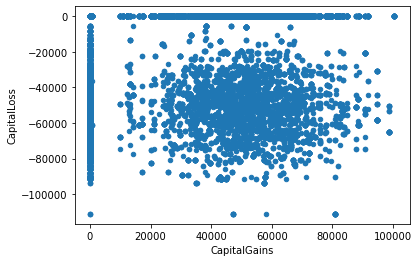

In [81]:
traindata.plot(kind='scatter', x='CapitalGains', y='CapitalLoss')

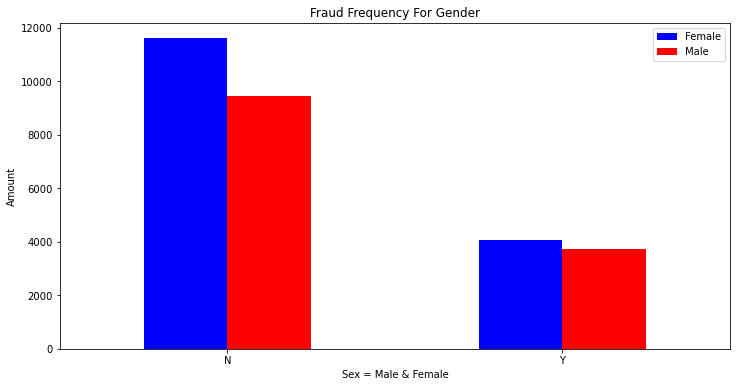

In [82]:
pd.crosstab(traindata.ReportedFraud, traindata.InsuredGender).plot(kind="bar",
                                          color=["blue","red"],
                                          figsize=(12,6))

plt.title("Fraud Frequency For Gender")
plt.xlabel("Sex = Male & Female")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation = 0);

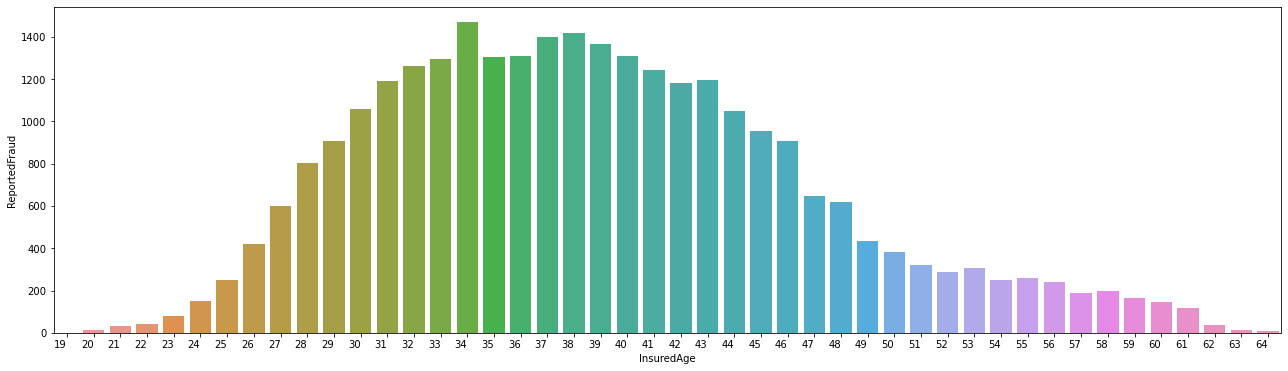

In [83]:
#checking the whitch age reported more fraud:
data=traindata.groupby('InsuredAge').agg({'ReportedFraud':'count'}).reset_index()

fig, (ax1) = plt.subplots(1,1,figsize=(22, 6))
graph =sns.barplot(x='InsuredAge', y='ReportedFraud', data = data, ax=ax1)

graph.set_xticklabels(graph.get_xticklabels(),
                    rotation=0,
                    horizontalalignment='right'
                    );

<AxesSubplot:xlabel='PoliceReport', ylabel='ReportedFraud'>

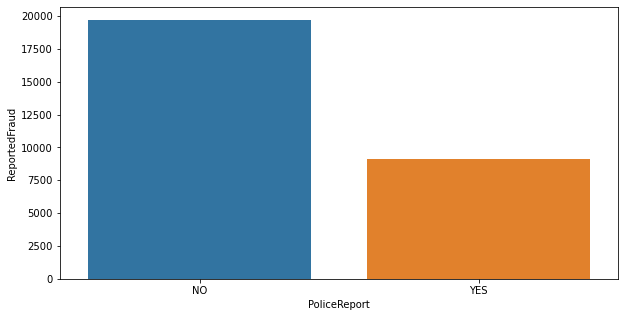

In [84]:
prdata=traindata.groupby('PoliceReport').agg({'ReportedFraud':'count'}).reset_index()
fig, (ax1) = plt.subplots(1,1,figsize=(10, 5))
sns.barplot(x='PoliceReport', y='ReportedFraud', data = prdata, ax=ax1)

<AxesSubplot:ylabel='ReportedFraud'>

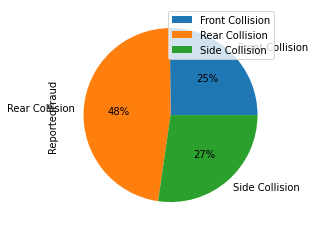

In [85]:
traindata.groupby(['TypeOfCollission']).count().plot(kind='pie', y='ReportedFraud', autopct='%1.0f%%')

In [86]:
# Dropping the insignificant attributes from train data:
traindata.drop(["CustomerID","VehicleID","Country","InsurancePolicyNumber","VehicleModel","InsuredHobbies","DateOfPolicyCoverage","InsuredRelationship","InsuredGender","InsurancePolicyState","Policy_CombinedSingleLimit","IncidentAddress","InsuredZipCode","IncidentState"], axis = 1, inplace=True)


In [87]:
# Checking the shape of train data after dropping the insignificant variables:
traindata.shape

(28836, 28)

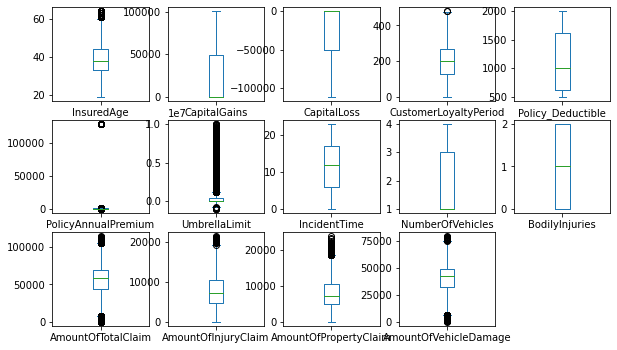

In [88]:
# Drawing the boxplot to identify the presence of outliers in train data: 
traindata.plot(kind ='box',subplots = True,sharex= False,sharey=False,layout=(5,5),figsize=(10,10))
plt.show()
# gives boxplot for all the attributes present in the data 

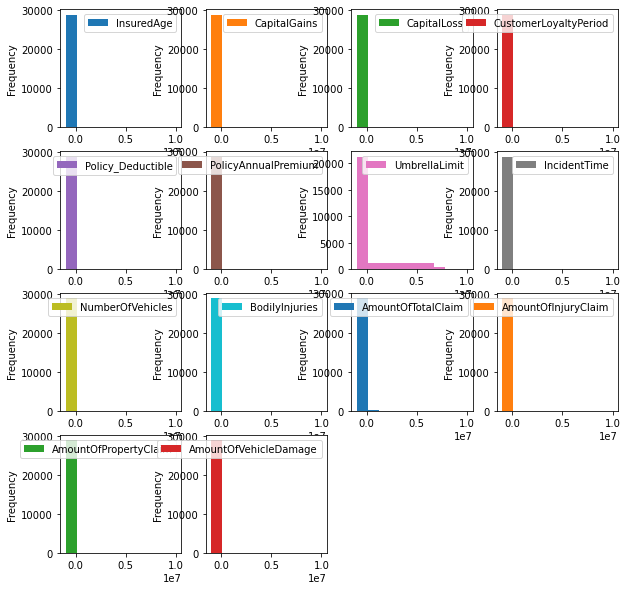

In [89]:
traindata.plot(kind ='hist',subplots = True,sharex= False,sharey=False,layout=(4,4),figsize=(10,10))
plt.show()

<AxesSubplot:xlabel='ReportedFraud', ylabel='count'>

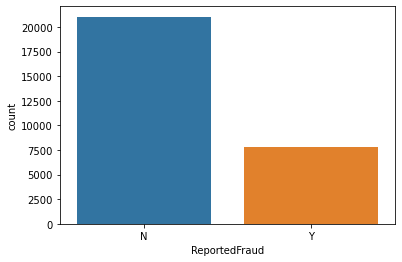

In [90]:
# Observing target variable counts through bargraph:
sns.countplot(x='ReportedFraud',data=traindata)

In [91]:
traindata['ReportedFraud'].value_counts()

N    21051
Y     7785
Name: ReportedFraud, dtype: int64

In [92]:
# Importing the required libraries to perform pre-processing in train data and splitting into train-test split:
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

In [93]:
# Dropping the target variable from train data and storing the rest of the attributes in "X" and target attribute in "y":
X = traindata.drop(["ReportedFraud"], axis = 1)
y = traindata["ReportedFraud"]

In [94]:
# printing the shapes of X and y: 
print(X.shape, y.shape)

(28836, 27) (28836,)


In [95]:
# Splitting the data to train and test with test size of 30% from train data 
# random state is used so that train and test data are maintained; 
#stratify is used as the data given is a class imbalance problem
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123,stratify=y)

In [96]:
#checking shape of train and test data:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20185, 27)
(8651, 27)
(20185,)
(8651,)


In [97]:
#defining numerical columns in data:
numeric_columns=traindata.select_dtypes(['float64','int64']).columns
numeric_columns

Index(['InsuredAge', 'CapitalGains', 'CapitalLoss', 'CustomerLoyaltyPeriod',
       'Policy_Deductible', 'PolicyAnnualPremium', 'UmbrellaLimit',
       'IncidentTime', 'NumberOfVehicles', 'BodilyInjuries',
       'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage'],
      dtype='object')

In [98]:
#defining categorical columns in data:
cat_columns=X_train.select_dtypes(['category']).columns
cat_columns

Index(['InsuredEducationLevel', 'InsuredOccupation', 'DateOfIncident',
       'TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident',
       'AuthoritiesContacted', 'IncidentCity', 'PropertyDamage', 'Witnesses',
       'PoliceReport', 'VehicleMake', 'VehicleYOM'],
      dtype='object')

In [99]:
# Target variable count in train data:
print(y_train.value_counts())

N    14736
Y     5449
Name: ReportedFraud, dtype: int64


In [100]:
# Importing the required classifiers for model building:
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score 

In [101]:
# Checking the top 5 records in X_train:
X_train.head()

,InsuredAge,InsuredEducationLevel,InsuredOccupation,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,DateOfIncident,...,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,VehicleMake,VehicleYOM
19571,43,College,farming-fishing,0,0,267.0,752.0,1380.50,0.0,2015-02-26,...,NO,0.0,1.0,NO,66137.0,9834.0,10007.0,46296.0,Saab,2001
22341,34,MD,farming-fishing,52600,-67800,122.0,702.0,1360.28,0.0,2015-01-10,...,NO,0.0,3.0,YES,58102.0,11037.0,5518.0,41547.0,Accura,2006
25085,36,High School,exec-managerial,36100,0,171.0,2000.0,1096.77,0.0,2015-01-03,...,NO,0.0,2.0,YES,50923.0,5370.0,7960.0,37593.0,BMW,2007
11675,47,JD,machine-op-inspct,41500,-33100,270.0,937.0,1588.11,0.0,2015-01-29,...,NO,2.0,2.0,NO,53325.0,11100.0,5925.0,36300.0,Nissan,2006
106,44,PhD,priv-house-serv,83200,0,292.0,500.0,1099.07,0.0,2015-02-28,...,NO,1.0,0.0,YES,61577.0,6232.0,6067.0,49278.0,Saab,2005


In [102]:
# Checking the top 5 records in y_train:
y_train.head(3)

19571    N
22341    N
25085    Y
Name: ReportedFraud, dtype: category
Categories (2, object): ['N', 'Y']

In [103]:
# Importing the required preprocessing libraries:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [104]:
#label encoding for target (y) variable:
le = LabelEncoder()

le.fit(y_train)

y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [105]:
#printing the target variable classes:
print(le.classes_)

['N' 'Y']


In [106]:
#inverse transfrom for target variable:
print(le.inverse_transform([0, 1]))

['N' 'Y']


In [107]:
#array of y_train target column count:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([14736,  5449], dtype=int64))

In [108]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([6315, 2336], dtype=int64))

In [109]:
#info of X_test:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8651 entries, 18564 to 9157
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   InsuredAge             8651 non-null   int64   
 1   InsuredEducationLevel  8651 non-null   category
 2   InsuredOccupation      8651 non-null   category
 3   CapitalGains           8651 non-null   int64   
 4   CapitalLoss            8651 non-null   int64   
 5   CustomerLoyaltyPeriod  8651 non-null   float64 
 6   Policy_Deductible      8651 non-null   float64 
 7   PolicyAnnualPremium    8651 non-null   float64 
 8   UmbrellaLimit          8651 non-null   float64 
 9   DateOfIncident         8651 non-null   category
 10  TypeOfIncident         8651 non-null   category
 11  TypeOfCollission       8651 non-null   category
 12  SeverityOfIncident     8651 non-null   category
 13  AuthoritiesContacted   8651 non-null   category
 14  IncidentCity           8651 non-null

In [110]:
#standardscaler for numerical columns
scaler = StandardScaler()
scaler.fit(X_train[numeric_columns])

X_train_num = pd.DataFrame(scaler.transform(X_train[numeric_columns]), columns=numeric_columns)
X_test_num = pd.DataFrame(scaler.transform(X_test[numeric_columns]), columns=numeric_columns)

In [111]:
#checking the head of data after scaling
X_train_num.head()

,InsuredAge,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,0.522028,-0.839492,0.887849,0.637893,-0.662400,-0.054794,-0.497296,0.531279,0.180554,-1.262542,0.557745,0.568441,0.630236,0.482915
1,-0.602893,1.063855,-1.541729,-0.814577,-0.753785,-0.057114,-0.497296,-1.418939,-0.840024,-1.262542,0.239032,0.840169,-0.397971,0.219290
2,-0.352911,0.466798,0.887849,-0.323743,1.618591,-0.087339,-0.497296,-0.606348,1.201131,-1.262542,-0.045727,-0.439865,0.161370,-0.000204
3,1.021993,0.662198,-0.298272,0.667944,-0.324272,-0.030981,-0.497296,-0.118794,1.201131,1.285135,0.049550,0.854399,-0.304748,-0.071980
4,0.647020,2.171126,0.887849,0.888319,-1.122984,-0.087075,-0.497296,0.043725,-0.840024,0.011296,0.376870,-0.245161,-0.272223,0.648451


In [112]:
#ohe = OneHotEncoder()
ohe = OneHotEncoder(handle_unknown='ignore', drop = "first")
ohe.fit(X_train[cat_columns])

columns_ohe = list(ohe.get_feature_names(cat_columns))

C:\Users\M SHYAMA KRISHNA\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [113]:
X_train_cat = ohe.transform(X_train[cat_columns])
X_test_cat  = ohe.transform(X_test[cat_columns])

In [114]:
X_train_cat = pd.DataFrame(X_train_cat.todense(), columns=columns_ohe)
X_test_cat  = pd.DataFrame(X_test_cat.todense(), columns=columns_ohe)

In [115]:
X_train_cat.head()

,InsuredEducationLevel_College,InsuredEducationLevel_High School,InsuredEducationLevel_JD,InsuredEducationLevel_MD,InsuredEducationLevel_Masters,InsuredEducationLevel_PhD,InsuredOccupation_armed-forces,InsuredOccupation_craft-repair,InsuredOccupation_exec-managerial,InsuredOccupation_farming-fishing,...,VehicleYOM_2006,VehicleYOM_2007,VehicleYOM_2008,VehicleYOM_2009,VehicleYOM_2010,VehicleYOM_2011,VehicleYOM_2012,VehicleYOM_2013,VehicleYOM_2014,VehicleYOM_2015
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
#droping the columns which are not given in test data
X_train_cat.drop(["DateOfIncident_2015-03-08","DateOfIncident_2015-03-10","DateOfIncident_2015-03-11","DateOfIncident_2015-03-12","DateOfIncident_2015-03-14"], axis = 1, inplace=True)

In [117]:
X_test_cat.drop(["DateOfIncident_2015-03-08","DateOfIncident_2015-03-10","DateOfIncident_2015-03-11","DateOfIncident_2015-03-12","DateOfIncident_2015-03-14"], axis = 1, inplace=True)

In [118]:
X_train = pd.concat([X_train_num, X_train_cat], axis=1)
X_test = pd.concat([X_test_num, X_test_cat], axis=1)

In [119]:
#checking the shape of train and test:
print(X_train.shape, X_test.shape)

(20185, 156) (8651, 156)


In [120]:
X_train.head(3)

,InsuredAge,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,IncidentTime,NumberOfVehicles,BodilyInjuries,...,VehicleYOM_2006,VehicleYOM_2007,VehicleYOM_2008,VehicleYOM_2009,VehicleYOM_2010,VehicleYOM_2011,VehicleYOM_2012,VehicleYOM_2013,VehicleYOM_2014,VehicleYOM_2015
0,0.522028,-0.839492,0.887849,0.637893,-0.662400,-0.054794,-0.497296,0.531279,0.180554,-1.262542,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.602893,1.063855,-1.541729,-0.814577,-0.753785,-0.057114,-0.497296,-1.418939,-0.840024,-1.262542,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.352911,0.466798,0.887849,-0.323743,1.618591,-0.087339,-0.497296,-0.606348,1.201131,-1.262542,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
X_test.head(3)

,InsuredAge,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,IncidentTime,NumberOfVehicles,BodilyInjuries,...,VehicleYOM_2006,VehicleYOM_2007,VehicleYOM_2008,VehicleYOM_2009,VehicleYOM_2010,VehicleYOM_2011,VehicleYOM_2012,VehicleYOM_2013,VehicleYOM_2014,VehicleYOM_2015
0,0.022063,1.483605,-1.652815,-1.585889,-0.366309,-0.056858,2.808657,0.531279,1.201131,0.011296,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.272046,-0.839492,-1.928741,0.407501,0.713871,-0.018658,-0.497296,-0.768866,1.201131,0.011296,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.227850,-0.839492,0.887849,-0.714407,-0.209126,-0.052126,-0.497296,-0.931385,-0.840024,0.011296,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
X_train.shape

(20185, 156)

In [123]:
scores = pd.DataFrame(columns=['Model', 'Train_Recall', 'Train_Precision', 'Train_F1_Score', 
                               'Test_Recall', 'Test_Precision', 'Test_F1_Score'])

def get_metrics(train_actual, train_predicted, test_actual, test_predicted, model_description, dataframe):

    train_recall    = recall_score(train_actual, train_predicted, average="weighted")
    train_precision = precision_score(train_actual, train_predicted, average="weighted")
    train_f1score   = f1_score(train_actual, train_predicted, average="weighted")
    
    test_recall     = recall_score(test_actual, test_predicted, average="weighted")
    test_precision  = precision_score(test_actual, test_predicted, average="weighted")
    test_f1score    = f1_score(test_actual, test_predicted, average="weighted")

    dataframe       = dataframe.append(pd.Series([model_description, 
                                                train_recall, train_precision, train_f1score,
                                                test_recall, test_precision, test_f1score],
                                                 index=scores.columns ), 
                                       ignore_index=True)

    return(dataframe)

In [124]:
def classifcation_report_train_test(y_train, y_train_pred, y_test, y_test_pred):

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================
            ''')
    print(classification_report(y_train, y_train_pred, digits=4))

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TEST DATA
            =========================================
            ''')
    print(classification_report(y_test, y_test_pred, digits=4))

# Logistic Regression

In [125]:
from sklearn.linear_model import LogisticRegression

In [126]:
logistic_model = LogisticRegression(solver='liblinear',random_state=1230)

In [127]:
Model=logistic_model.fit(X_train,y_train)

In [128]:
y_train_Pred_log = logistic_model.predict(X_train)
y_test_Pred_log = logistic_model.predict(X_test)

In [129]:
y_pred = logistic_model.predict(X_test)

In [130]:
from sklearn.metrics import confusion_matrix, accuracy_score
cmr = confusion_matrix(y_test, y_pred)
print(cmr)

[[5781  534]
 [1174 1162]]


In [131]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)


print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[5781  534]
 [1174 1162]]

True Positives(TP) =  5781

True Negatives(TN) =  1162

False Positives(FP) =  534

False Negatives(FN) =  1174


In [132]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.706435468389028

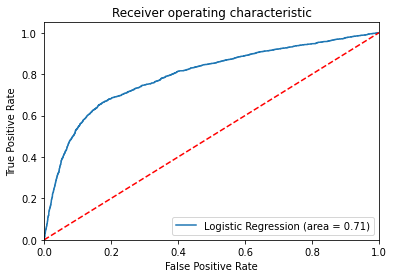

In [133]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logistic_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [134]:
classifcation_report_train_test(y_train, y_train_Pred_log, y_test, y_test_Pred_log)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.8281    0.9146    0.8692     14736
           1     0.6783    0.4867    0.5667      5449

    accuracy                         0.7991     20185
   macro avg     0.7532    0.7007    0.7180     20185
weighted avg     0.7877    0.7991    0.7876     20185


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.8312    0.9154    0.8713      6315
           1     0.6851    0.4974    0.5764      2336

    accuracy                         0.8026      8651
   macro avg     0.7582    0.7064    0.7238      8651
weighted avg     0.7918    0.8026    0.7917      8651



In [135]:
scores=get_metrics(y_train,y_train_Pred_log,y_test,y_test_Pred_log,"Logistic",scores)
scores

,Model,Train_Recall,Train_Precision,Train_F1_Score,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic,0.799108,0.787681,0.787576,0.802566,0.791761,0.791658


# Lasso logistic regression

In [136]:
l1_model = LogisticRegression(penalty='l1', solver='saga')

In [137]:
Model2=l1_model.fit(X_train,y_train)

C:\Users\M SHYAMA KRISHNA\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [138]:
y_train_Pred_log1 = l1_model.predict(X_train)
y_test_Pred_log1 = l1_model.predict(X_test)

In [139]:
y_pred1 = l1_model.predict(X_test)

In [140]:
from sklearn.metrics import confusion_matrix, accuracy_score
cmr = confusion_matrix(y_test, y_pred1)
print(cmr)

[[5780  535]
 [1179 1157]]


In [141]:
cm = confusion_matrix(y_test, y_pred1)

print('Confusion matrix\n\n', cm)


print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[5780  535]
 [1179 1157]]

True Positives(TP) =  5780

True Negatives(TN) =  1157

False Positives(FP) =  535

False Negatives(FN) =  1179


In [142]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred1)

0.7052860863458389

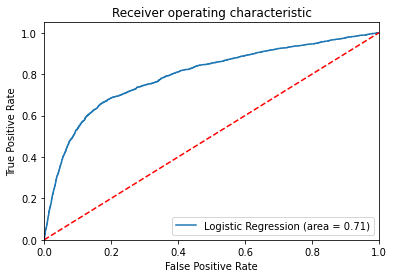

In [143]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, l1_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, l1_model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [144]:
classifcation_report_train_test(y_train, y_train_Pred_log1, y_test, y_test_Pred_log1)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.8285    0.9138    0.8691     14736
           1     0.6770    0.4885    0.5675      5449

    accuracy                         0.7990     20185
   macro avg     0.7528    0.7012    0.7183     20185
weighted avg     0.7876    0.7990    0.7877     20185


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.8306    0.9153    0.8709      6315
           1     0.6838    0.4953    0.5745      2336

    accuracy                         0.8019      8651
   macro avg     0.7572    0.7053    0.7227      8651
weighted avg     0.7909    0.8019    0.7908      8651



In [145]:
scores=get_metrics(y_train,y_train_Pred_log1,y_test,y_test_Pred_log1,"Lasso_LR",scores)
scores

,Model,Train_Recall,Train_Precision,Train_F1_Score,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic,0.799108,0.787681,0.787576,0.802566,0.791761,0.791658
1,Lasso_LR,0.799009,0.787622,0.787678,0.801873,0.790947,0.790840


# Ridge logistic regression

In [146]:
l2_model = LogisticRegression(penalty='l2', solver='saga')

In [147]:
Model3=l2_model.fit(X_train,y_train)

C:\Users\M SHYAMA KRISHNA\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [148]:
y_train_Pred_log2 = l2_model.predict(X_train)
y_test_Pred_log2 = l2_model.predict(X_test)

In [149]:
y_pred2 = l1_model.predict(X_test)

In [150]:
from sklearn.metrics import confusion_matrix, accuracy_score
cmr = confusion_matrix(y_test, y_pred2)
print(cmr)

[[5780  535]
 [1179 1157]]


In [151]:
cm = confusion_matrix(y_test, y_pred2)

print('Confusion matrix\n\n', cm)


print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[5780  535]
 [1179 1157]]

True Positives(TP) =  5780

True Negatives(TN) =  1157

False Positives(FP) =  535

False Negatives(FN) =  1179


In [152]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred2)

0.7052860863458389

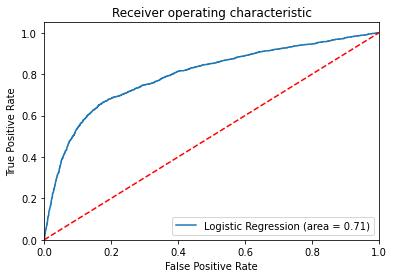

In [153]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, l2_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, l2_model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [154]:
classifcation_report_train_test(y_train, y_train_Pred_log2, y_test, y_test_Pred_log2)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.8280    0.9146    0.8692     14736
           1     0.6781    0.4863    0.5664      5449

    accuracy                         0.7990     20185
   macro avg     0.7531    0.7005    0.7178     20185
weighted avg     0.7876    0.7990    0.7875     20185


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.8311    0.9156    0.8713      6315
           1     0.6854    0.4970    0.5762      2336

    accuracy                         0.8026      8651
   macro avg     0.7582    0.7063    0.7237      8651
weighted avg     0.7918    0.8026    0.7916      8651



In [155]:
scores=get_metrics(y_train,y_train_Pred_log2,y_test,y_test_Pred_log2,"Ridge_LR",scores)
scores

,Model,Train_Recall,Train_Precision,Train_F1_Score,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic,0.799108,0.787681,0.787576,0.802566,0.791761,0.791658
1,Lasso_LR,0.799009,0.787622,0.787678,0.801873,0.790947,0.790840
2,Ridge_LR,0.799009,0.787562,0.787452,0.802566,0.791750,0.791615


##### RANDOM FOREST

In [156]:
rf = RandomForestClassifier()

In [157]:
rf.fit(X=X_train, y=y_train)

RandomForestClassifier()

In [158]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

In [159]:
classifcation_report_train_test(y_train, y_pred_train, y_test, y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000     14736
           1     1.0000    1.0000    1.0000      5449

    accuracy                         1.0000     20185
   macro avg     1.0000    1.0000    1.0000     20185
weighted avg     1.0000    1.0000    1.0000     20185


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.9135    0.9762    0.9438      6315
           1     0.9211    0.7500    0.8268      2336

    accuracy                         0.9152      8651
   macro avg     0.9173    0.8631    0.8853      8651
weighted avg     0.9155    0.9152    0.9122      8651



In [160]:
scores = get_metrics(y_train, y_pred_train, y_test, y_pred_test, "RandomForest", scores)
scores

,Model,Train_Recall,Train_Precision,Train_F1_Score,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic,0.799108,0.787681,0.787576,0.802566,0.791761,0.791658
1,Lasso_LR,0.799009,0.787622,0.787678,0.801873,0.790947,0.790840
2,Ridge_LR,0.799009,0.787562,0.787452,0.802566,0.791750,0.791615
3,RandomForest,1.000000,1.000000,1.000000,0.915154,0.915539,0.912219


#### XG-BOOST

In [161]:
!pip install xgboost

In [162]:
from xgboost import XGBClassifier

In [163]:
xgb = XGBClassifier()

In [164]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [165]:
y_pred_train_xg = xgb.predict(X_train)
y_pred_test_xg= xgb.predict(X_test)

In [166]:
classifcation_report_train_test(y_train, y_pred_train_xg, y_test, y_pred_test_xg)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.9490    0.9875    0.9679     14736
           1     0.9621    0.8565    0.9062      5449

    accuracy                         0.9521     20185
   macro avg     0.9555    0.9220    0.9370     20185
weighted avg     0.9525    0.9521    0.9512     20185


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.9210    0.9656    0.9428      6315
           1     0.8931    0.7761    0.8305      2336

    accuracy                         0.9145      8651
   macro avg     0.9071    0.8709    0.8867      8651
weighted avg     0.9135    0.9145    0.9125      8651



In [167]:
scores = get_metrics(y_train, y_pred_train_xg, y_test, y_pred_test_xg, "Xgboost", scores)
scores

,Model,Train_Recall,Train_Precision,Train_F1_Score,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic,0.799108,0.787681,0.787576,0.802566,0.791761,0.791658
1,Lasso_LR,0.799009,0.787622,0.787678,0.801873,0.790947,0.790840
2,Ridge_LR,0.799009,0.787562,0.787452,0.802566,0.791750,0.791615
3,RandomForest,1.000000,1.000000,1.000000,0.915154,0.915539,0.912219
4,Xgboost,0.952143,0.952530,0.951229,0.914461,0.913474,0.912475


In [168]:
XGB = XGBClassifier(n_jobs=-1)
 
# Use a grid over parameters of interest
param_grid = {
    'colsample_bytree': np.linspace(0.6, 0.8, 2),
    'n_estimators': [50, 100],
    'max_depth': [5, 6]}

CV_XGB = GridSearchCV(estimator=XGB, param_grid=param_grid, cv=3)

In [169]:
CV_XGB.fit(X=X_train, y=y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
    

In [170]:
# find the best model

In [171]:
best_xgb_model = CV_XGB.best_estimator_

In [172]:
print(CV_XGB.best_score_, CV_XGB.best_params_)

0.9026007542910174 {'colsample_bytree': 0.6, 'max_depth': 6, 'n_estimators': 100}


In [173]:
# best_xgb_model

In [174]:
y_pred_train_xgv = best_xgb_model.predict(X_train)
y_pred_test_xgv = best_xgb_model.predict(X_test)

In [175]:
classifcation_report_train_test(y_train, y_pred_train_xgv, y_test, y_pred_test_xgv)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.9461    0.9860    0.9657     14736
           1     0.9573    0.8482    0.8995      5449

    accuracy                         0.9488     20185
   macro avg     0.9517    0.9171    0.9326     20185
weighted avg     0.9492    0.9488    0.9478     20185


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.9149    0.9634    0.9385      6315
           1     0.8846    0.7577    0.8162      2336

    accuracy                         0.9079      8651
   macro avg     0.8997    0.8606    0.8774      8651
weighted avg     0.9067    0.9079    0.9055      8651



In [176]:
scores = get_metrics(y_train, y_pred_train_xgv, y_test, y_pred_test_xgv, "XGBoostGV", scores)
scores

,Model,Train_Recall,Train_Precision,Train_F1_Score,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic,0.799108,0.787681,0.787576,0.802566,0.791761,0.791658
1,Lasso_LR,0.799009,0.787622,0.787678,0.801873,0.790947,0.790840
2,Ridge_LR,0.799009,0.787562,0.787452,0.802566,0.791750,0.791615
3,RandomForest,1.000000,1.000000,1.000000,0.915154,0.915539,0.912219
4,Xgboost,0.952143,0.952530,0.951229,0.914461,0.913474,0.912475
5,XGBoostGV,0.948823,0.949167,0.947805,0.907872,0.906697,0.905504


In [177]:
#random forest,knn,xgboost,

##### KNN 

In [178]:
from sklearn.neighbors import KNeighborsClassifier

In [179]:
model_knn= KNeighborsClassifier(n_neighbors=5)  #n_neighbors=5 (By default)
model_knn.fit(X_train,y_train)

KNeighborsClassifier()

In [180]:
y_train_pred_knn = model_knn.predict(X_train)
y_test_pred_knn  = model_knn.predict(X_test)

In [181]:
classifcation_report_train_test(y_train, y_train_pred_knn, y_test, y_test_pred_knn)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.9416    0.9806    0.9607     14736
           1     0.9409    0.8354    0.8850      5449

    accuracy                         0.9414     20185
   macro avg     0.9412    0.9080    0.9228     20185
weighted avg     0.9414    0.9414    0.9402     20185


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.9386    0.9762    0.9571      6315
           1     0.9280    0.8275    0.8749      2336

    accuracy                         0.9361      8651
   macro avg     0.9333    0.9019    0.9160      8651
weighted avg     0.9358    0.9361    0.9349      8651



In [182]:
scores=get_metrics(y_train,y_train_pred_knn,y_test,y_test_pred_knn,"KNN",scores)
scores

,Model,Train_Recall,Train_Precision,Train_F1_Score,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic,0.799108,0.787681,0.787576,0.802566,0.791761,0.791658
1,Lasso_LR,0.799009,0.787622,0.787678,0.801873,0.790947,0.790840
2,Ridge_LR,0.799009,0.787562,0.787452,0.802566,0.791750,0.791615
3,RandomForest,1.000000,1.000000,1.000000,0.915154,0.915539,0.912219
4,Xgboost,0.952143,0.952530,0.951229,0.914461,0.913474,0.912475
5,XGBoostGV,0.948823,0.949167,0.947805,0.907872,0.906697,0.905504
6,KNN,0.941392,0.941372,0.940247,0.936077,0.935765,0.934875


#### SMOTE IMPLEMENTATION 

In [183]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=123)

In [184]:
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [185]:
X_train_sm.shape

(29472, 156)

In [186]:
y_train_sm.shape

(29472,)

In [187]:
print(pd.value_counts(y_train_sm, normalize=True) * 100)

0    50.0
1    50.0
dtype: float64


##### RANDOM FOREST USING SMOTE

In [188]:
rfclf2 = RandomForestClassifier(class_weight='balanced')

In [189]:
rfclf2 = rfclf2.fit(X_train_sm, y_train_sm)

In [190]:
train_pred=rfclf2.predict(X_train_sm)
test_pred=rfclf2.predict(X_test)

In [191]:
classifcation_report_train_test(y_train_sm, train_pred, y_test, test_pred)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.9999    1.0000    1.0000     14736
           1     1.0000    0.9999    1.0000     14736

    accuracy                         1.0000     29472
   macro avg     1.0000    1.0000    1.0000     29472
weighted avg     1.0000    1.0000    1.0000     29472


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.9171    0.9685    0.9421      6315
           1     0.8996    0.7633    0.8258      2336

    accuracy                         0.9131      8651
   macro avg     0.9083    0.8659    0.8840      8651
weighted avg     0.9124    0.9131    0.9107      8651



In [192]:
scores=get_metrics(y_train_sm,train_pred,y_test,test_pred,"Random forest_smote",scores)
scores

,Model,Train_Recall,Train_Precision,Train_F1_Score,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic,0.799108,0.787681,0.787576,0.802566,0.791761,0.791658
1,Lasso_LR,0.799009,0.787622,0.787678,0.801873,0.790947,0.790840
2,Ridge_LR,0.799009,0.787562,0.787452,0.802566,0.791750,0.791615
3,RandomForest,1.000000,1.000000,1.000000,0.915154,0.915539,0.912219
4,Xgboost,0.952143,0.952530,0.951229,0.914461,0.913474,0.912475
5,XGBoostGV,0.948823,0.949167,0.947805,0.907872,0.906697,0.905504
6,KNN,0.941392,0.941372,0.940247,0.936077,0.935765,0.934875
7,Random forest_smote,0.999966,0.999966,0.999966,0.913074,0.912358,0.910695


#### KNN USING SMOTE 

In [193]:
model_knn= KNeighborsClassifier(n_neighbors=5)  #n_neighbors=5 (By default)
model_knn.fit(X_train_sm,y_train_sm)

KNeighborsClassifier()

In [194]:
y_train_pred_knn1 = model_knn.predict(X_train_sm)
y_test_pred_knn1  = model_knn.predict(X_test)

In [195]:
classifcation_report_train_test(y_train_sm, y_train_pred_knn1, y_test, y_test_pred_knn1)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.9710    0.9277    0.9489     14736
           1     0.9308    0.9723    0.9511     14736

    accuracy                         0.9500     29472
   macro avg     0.9509    0.9500    0.9500     29472
weighted avg     0.9509    0.9500    0.9500     29472


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.9423    0.8846    0.9125      6315
           1     0.7323    0.8536    0.7883      2336

    accuracy                         0.8762      8651
   macro avg     0.8373    0.8691    0.8504      8651
weighted avg     0.8856    0.8762    0.8790      8651



In [196]:
scores=get_metrics(y_train_sm,y_train_pred_knn1,y_test,y_test_pred_knn1,"KNN_smote",scores)
scores

,Model,Train_Recall,Train_Precision,Train_F1_Score,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic,0.799108,0.787681,0.787576,0.802566,0.791761,0.791658
1,Lasso_LR,0.799009,0.787622,0.787678,0.801873,0.790947,0.790840
2,Ridge_LR,0.799009,0.787562,0.787452,0.802566,0.791750,0.791615
3,RandomForest,1.000000,1.000000,1.000000,0.915154,0.915539,0.912219
4,Xgboost,0.952143,0.952530,0.951229,0.914461,0.913474,0.912475
5,XGBoostGV,0.948823,0.949167,0.947805,0.907872,0.906697,0.905504
6,KNN,0.941392,0.941372,0.940247,0.936077,0.935765,0.934875
7,Random forest_smote,0.999966,0.999966,0.999966,0.913074,0.912358,0.910695
8,KNN_smote,0.950020,0.950917,0.949996,0.876199,0.885595,0.878978


##### XG-BOOST USING SMOTE 

In [197]:
from xgboost import XGBClassifier

In [198]:
xgb = XGBClassifier()

In [199]:
xgb.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [200]:
y_pred_train_xsmote = xgb.predict(X_train_sm)
y_pred_test_xsmote = xgb.predict(X_test)

In [201]:
classifcation_report_train_test(y_train_sm, y_pred_train_xsmote, y_test, y_pred_test_xsmote)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.9453    0.9841    0.9643     14736
           1     0.9834    0.9431    0.9628     14736

    accuracy                         0.9636     29472
   macro avg     0.9644    0.9636    0.9636     29472
weighted avg     0.9644    0.9636    0.9636     29472


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.9176    0.9610    0.9388      6315
           1     0.8792    0.7667    0.8191      2336

    accuracy                         0.9086      8651
   macro avg     0.8984    0.8639    0.8790      8651
weighted avg     0.9072    0.9086    0.9065      8651



In [202]:
scores = get_metrics(y_train_sm, y_pred_train_xsmote, y_test, y_pred_test_xsmote, "Xgboost_smote", scores)
scores

,Model,Train_Recall,Train_Precision,Train_F1_Score,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic,0.799108,0.787681,0.787576,0.802566,0.791761,0.791658
1,Lasso_LR,0.799009,0.787622,0.787678,0.801873,0.790947,0.790840
2,Ridge_LR,0.799009,0.787562,0.787452,0.802566,0.791750,0.791615
3,RandomForest,1.000000,1.000000,1.000000,0.915154,0.915539,0.912219
4,Xgboost,0.952143,0.952530,0.951229,0.914461,0.913474,0.912475
5,XGBoostGV,0.948823,0.949167,0.947805,0.907872,0.906697,0.905504
6,KNN,0.941392,0.941372,0.940247,0.936077,0.935765,0.934875
7,Random forest_smote,0.999966,0.999966,0.999966,0.913074,0.912358,0.910695
8,KNN_smote,0.950020,0.950917,0.949996,0.876199,0.885595,0.878978
9,Xgboost_smote,0.963593,0.964375,0.963577,0.908565,0.907239,0.906497


#### ANN

In [203]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# tf.random.set_seed(0)

In [204]:
# model = Sequential()
# model.add(Dense(64, activation='relu', input_shape=(156,)))
# model.add(Dropout(0.1))
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(16, input_dim=1, activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(12, activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(1, activation='sigmoid'))

In [205]:
# # fit the model
# model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy', 'AUC'])
# model.fit(X_train_sm, y_train_sm, epochs=35, batch_size=64, validation_data=(X_test, y_test), validation_batch_size=64, verbose=0)

In [206]:
# y_pred = model.predict(X_test)
# y_pred = y_pred.flatten()
# print(y_pred.round(2))

In [207]:
# y_train_Pred_ann = model.predict(X_train_sm)

In [208]:
# y_pred = np.round(y_pred > 0.5, 1, 0)
# print(y_pred)

In [209]:
# print(confusion_matrix(y_test, y_pred))

In [210]:
# print(classification_report(y_test, y_pred))

In [211]:
# y_pred

In [212]:
# scores=get_metrics(y_train_sm,y_train_Pred_ann,y_test,y_pred,"ANN_model_smote",scores)
# scores

# TEST DATA

In [213]:
# Reading the test data:
# Reading Test_Demographics data:
TD_data6 = pd.read_csv("Test_Demographics.csv",na_values="NA")

In [214]:
# Observing the top 5 records of data6:
TD_data6.head()

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
0,Cust10008,27,471704,FEMALE,High School,adm-clerical,base-jumping,56400,-57000,India
1,Cust10010,40,455810,FEMALE,MD,prof-specialty,golf,56700,-65600,India
2,Cust10015,39,461919,MALE,JD,other-service,movies,30400,0,India
3,Cust10020,38,600904,FEMALE,Masters,exec-managerial,video-games,68500,0,India
4,Cust1003,29,430632,FEMALE,PhD,sales,board-games,35100,0,India


In [215]:
# Observing No of rows and columns in data6:
TD_data6.shape

(8912, 10)

In [216]:
# Observing the data types in data6:
TD_data6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8912 entries, 0 to 8911
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CustomerID             8912 non-null   object
 1   InsuredAge             8912 non-null   int64 
 2   InsuredZipCode         8912 non-null   int64 
 3   InsuredGender          8904 non-null   object
 4   InsuredEducationLevel  8912 non-null   object
 5   InsuredOccupation      8912 non-null   object
 6   InsuredHobbies         8912 non-null   object
 7   CapitalGains           8912 non-null   int64 
 8   CapitalLoss            8912 non-null   int64 
 9   Country                8908 non-null   object
dtypes: int64(4), object(6)
memory usage: 696.4+ KB


In [217]:
# Checking null values in data6:
TD_data6.isnull().sum()

CustomerID               0
InsuredAge               0
InsuredZipCode           0
InsuredGender            8
InsuredEducationLevel    0
InsuredOccupation        0
InsuredHobbies           0
CapitalGains             0
CapitalLoss              0
Country                  4
dtype: int64

In [218]:
# Checking the summary statistics of the data:
TD_data6.describe()

,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss
count,8912.000000,8912.000000,8912.000000,8912.000000
mean,38.743492,501558.312949,23413.004937,-25365.888689
std,7.914619,72051.904910,27821.325212,28032.959284
min,19.000000,430104.000000,0.000000,-111100.000000
25%,33.000000,447469.000000,0.000000,-50400.000000
50%,38.000000,466303.000000,0.000000,0.000000
75%,44.000000,603527.000000,49900.000000,0.000000
max,64.000000,620962.000000,100500.000000,0.000000


In [219]:
# Creating a list of numerical and categorical attributes:
num_cols = ["InsuredAge", "InsuredZipCode", "CapitalGains", "CapitalLoss"]
cat_cols = ["CustomerID", "InsuredGender", "InsuredEducationLevel", "InsuredOccupation", "InsuredHobbies", "Country"]

In [220]:
# Converting object data types to category in data6:
TD_data6[cat_cols] = TD_data6[cat_cols].astype('category')

In [221]:
cat_var=TD_data6.select_dtypes('category').columns

In [222]:
# Checking the datatypes after type conversion:
TD_data6.dtypes

CustomerID               category
InsuredAge                  int64
InsuredZipCode              int64
InsuredGender            category
InsuredEducationLevel    category
InsuredOccupation        category
InsuredHobbies           category
CapitalGains                int64
CapitalLoss                 int64
Country                  category
dtype: object

In [223]:
# Missing values imputation in categorical attributes with 'Most Frequent value':
cat_imputer = SimpleImputer(strategy='most_frequent')
TD_data6[cat_var]=cat_imputer.fit_transform(TD_data6[cat_var])

In [224]:
# Checking the null values after imputation:
TD_data6.isnull().sum()

CustomerID               0
InsuredAge               0
InsuredZipCode           0
InsuredGender            0
InsuredEducationLevel    0
InsuredOccupation        0
InsuredHobbies           0
CapitalGains             0
CapitalLoss              0
Country                  0
dtype: int64

In [225]:
# Checking the unique values in the data:
TD_data6.nunique()

CustomerID               8912
InsuredAge                 46
InsuredZipCode            994
InsuredGender               2
InsuredEducationLevel       7
InsuredOccupation          14
InsuredHobbies             20
CapitalGains              338
CapitalLoss               353
Country                     1
dtype: int64

In [226]:
# Reading Test_Policy data:
TP_data7 = pd.read_csv('Test_Policy.csv', na_values=["NA",-1,"MISSINGVAL"])

In [227]:
# Observing the top 5 records of data7:
TP_data7.head()

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID
0,110124,134,2000-09-06,State3,100/300,2000,1413.14,5000000,own-child,Cust1003
1,110129,165,1990-02-03,State1,100/300,1000,1137.03,0,unmarried,Cust1008
2,110137,473,1992-10-19,State2,100/300,2000,1131.40,0,other-relative,Cust1016
3,110140,160,2014-12-28,State3,500/1000,500,1374.22,0,other-relative,Cust1019
4,110141,196,1992-08-02,State2,500/1000,2000,1475.73,0,own-child,Cust1020


In [228]:
# Observing No of rows and columns in data7:
TP_data7.shape

(8912, 10)

In [229]:
# Observing the data types in data7:
TP_data7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8912 entries, 0 to 8911
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   InsurancePolicyNumber       8912 non-null   int64  
 1   CustomerLoyaltyPeriod       8912 non-null   int64  
 2   DateOfPolicyCoverage        8912 non-null   object 
 3   InsurancePolicyState        8912 non-null   object 
 4   Policy_CombinedSingleLimit  8912 non-null   object 
 5   Policy_Deductible           8912 non-null   int64  
 6   PolicyAnnualPremium         8865 non-null   float64
 7   UmbrellaLimit               8912 non-null   int64  
 8   InsuredRelationship         8912 non-null   object 
 9   CustomerID                  8912 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 696.4+ KB


In [230]:
# Checking null values in data7:
TP_data7.isnull().sum()

InsurancePolicyNumber          0
CustomerLoyaltyPeriod          0
DateOfPolicyCoverage           0
InsurancePolicyState           0
Policy_CombinedSingleLimit     0
Policy_Deductible              0
PolicyAnnualPremium           47
UmbrellaLimit                  0
InsuredRelationship            0
CustomerID                     0
dtype: int64

In [231]:
# Checking the summary statistics of the data:
TP_data7.describe()

,InsurancePolicyNumber,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit
count,8912.000000,8912.000000,8912.000000,8865.000000,8.912000e+03
mean,130481.939295,203.055206,1123.580790,1260.235059,9.318594e+05
std,10879.022180,98.423250,553.139684,205.534081,1.919603e+06
min,110124.000000,0.000000,500.000000,433.330000,-8.836920e+05
25%,121312.500000,127.000000,622.000000,1119.460000,0.000000e+00
50%,130807.000000,199.000000,1000.000000,1265.840000,0.000000e+00
75%,139904.000000,265.000000,1691.250000,1399.240000,2.836810e+05
max,148617.000000,478.000000,2000.000000,2033.540000,9.699227e+06


In [232]:
# Creating a list of numerical and categorical attributes:
num_cols = ["InsurancePolicyNumber", "CustomerLoyaltyPeriod", "Policy_Deductible", "PolicyAnnualPremium", "UmbrellaLimit"]
cat_cols = ["CustomerID", "DateOfPolicyCoverage", "InsurancePolicyState", "Policy_CombinedSingleLimit", "InsuredRelationship"]

In [233]:
# Converting object data types to category in data7:
TP_data7[cat_cols] = TP_data7[cat_cols].astype('category')

In [234]:
# Checking the datatypes after type conversion:
TP_data7.dtypes

InsurancePolicyNumber            int64
CustomerLoyaltyPeriod            int64
DateOfPolicyCoverage          category
InsurancePolicyState          category
Policy_CombinedSingleLimit    category
Policy_Deductible                int64
PolicyAnnualPremium            float64
UmbrellaLimit                    int64
InsuredRelationship           category
CustomerID                    category
dtype: object

In [235]:
#coverting num_cols int to float
TP_data7[num_cols] = TP_data7[num_cols].astype('float64')

In [236]:
# imputing policy annual premium using mean data7:
TP_data7[num_cols] = TP_data7[num_cols].fillna(TP_data7[num_cols].median()[0])

In [237]:
# checking null values after imputation:
TP_data7.isnull().sum()

InsurancePolicyNumber         0
CustomerLoyaltyPeriod         0
DateOfPolicyCoverage          0
InsurancePolicyState          0
Policy_CombinedSingleLimit    0
Policy_Deductible             0
PolicyAnnualPremium           0
UmbrellaLimit                 0
InsuredRelationship           0
CustomerID                    0
dtype: int64

In [238]:
# Checking the unique values:
TP_data7.nunique()

InsurancePolicyNumber         8912
CustomerLoyaltyPeriod          476
DateOfPolicyCoverage          4533
InsurancePolicyState             3
Policy_CombinedSingleLimit       9
Policy_Deductible             1292
PolicyAnnualPremium           8357
UmbrellaLimit                 2144
InsuredRelationship              6
CustomerID                    8912
dtype: int64

In [239]:
# Reading Test_Claim data:
TC_data8 = pd.read_csv('Test_Claim.csv', na_values=["?", -5, "MISSINGVALUE", "MISSEDDATA"])

In [240]:
# Observing the top 5 records of data8:
TC_data8.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Cust10008,2015-02-05,Multi-vehicle Collision,Front Collision,Minor Damage,Ambulance,State5,City2,Location 1354,4.0,3,NO,0,0.0,NaN,68354.0,6835,8059,53460
1,Cust10010,2015-01-13,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City5,Location 1383,16.0,1,NaN,1,1.0,NaN,55270.0,8113,5240,41917
2,Cust10015,2015-01-05,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 2030,20.0,3,NO,0,1.0,NaN,59515.0,7490,9110,42915
3,Cust10020,2015-01-03,Vehicle Theft,NaN,Trivial Damage,None,State7,City5,Location 1449,10.0,1,NaN,2,1.0,NaN,4941.0,494,866,3581
4,Cust1003,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 1916,7.0,3,NO,2,3.0,NO,34650.0,7700,3850,23100


In [241]:
# Observing No of rows and columns in data8:
TC_data8.shape

(8912, 19)

In [242]:
# Observing the data types in data8:
TC_data8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8912 entries, 0 to 8911
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             8912 non-null   object 
 1   DateOfIncident         8912 non-null   object 
 2   TypeOfIncident         8912 non-null   object 
 3   TypeOfCollission       7149 non-null   object 
 4   SeverityOfIncident     8912 non-null   object 
 5   AuthoritiesContacted   8912 non-null   object 
 6   IncidentState          8912 non-null   object 
 7   IncidentCity           8912 non-null   object 
 8   IncidentAddress        8912 non-null   object 
 9   IncidentTime           8905 non-null   float64
 10  NumberOfVehicles       8912 non-null   int64  
 11  PropertyDamage         5713 non-null   object 
 12  BodilyInjuries         8912 non-null   int64  
 13  Witnesses              8900 non-null   float64
 14  PoliceReport           5898 non-null   object 
 15  Amou

In [243]:
# Checking null values in data8:
TC_data8.isnull().sum()

CustomerID                  0
DateOfIncident              0
TypeOfIncident              0
TypeOfCollission         1763
SeverityOfIncident          0
AuthoritiesContacted        0
IncidentState               0
IncidentCity                0
IncidentAddress             0
IncidentTime                7
NumberOfVehicles            0
PropertyDamage           3199
BodilyInjuries              0
Witnesses                  12
PoliceReport             3014
AmountOfTotalClaim          8
AmountOfInjuryClaim         0
AmountOfPropertyClaim       0
AmountOfVehicleDamage       0
dtype: int64

In [244]:
# Checking the summary statistics of the data8:
TC_data8.describe()

,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
count,8905.000000,8912.000000,8912.000000,8900.000000,8904.000000,8912.000000,8912.000000,8912.000000
mean,11.785963,1.801616,0.988330,1.494157,51092.660827,7214.076750,7114.529286,36761.520646
std,6.157104,0.972594,0.783827,1.046545,25653.520520,4447.763373,4367.824773,18381.523101
min,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000
25%,6.000000,1.000000,0.000000,1.000000,42288.250000,4409.000000,4508.250000,30215.750000
50%,12.000000,1.000000,1.000000,1.000000,57770.500000,7133.500000,6988.500000,41913.000000
75%,17.000000,3.000000,2.000000,2.000000,68518.250000,10378.500000,10184.500000,49222.000000
max,23.000000,4.000000,2.000000,3.000000,112320.000000,20989.000000,23498.000000,77760.000000


In [245]:
num_att = ['IncidentTime','NumberOfVehicles','BodilyInjuries','Witnesses','AmountOfTotalClaim','AmountOfInjuryClaim','AmountOfPropertyClaim','AmountOfVehicleDamage']
categorical = ['CustomerID','DateOfIncident','TypeOfIncident','TypeOfCollission','SeverityOfIncident','AuthoritiesContacted','IncidentState','IncidentCity','IncidentAddress','PropertyDamage','PoliceReport']

In [246]:
categorical = TC_data8.select_dtypes(include = 'object').columns
TC_data8[categorical] = TC_data8[categorical].astype('category')

In [247]:
TC_data8[num_att] = TC_data8[num_att].astype('float64')

In [248]:
TC_data8.dtypes

CustomerID               category
DateOfIncident           category
TypeOfIncident           category
TypeOfCollission         category
SeverityOfIncident       category
AuthoritiesContacted     category
IncidentState            category
IncidentCity             category
IncidentAddress          category
IncidentTime              float64
NumberOfVehicles          float64
PropertyDamage           category
BodilyInjuries            float64
Witnesses                 float64
PoliceReport             category
AmountOfTotalClaim        float64
AmountOfInjuryClaim       float64
AmountOfPropertyClaim     float64
AmountOfVehicleDamage     float64
dtype: object

In [249]:
TC_data8[categorical] = TC_data8[categorical].astype('category')

In [250]:
# imputing policy annual premium using mean data2:
TC_data8[num_att] = TC_data8[num_att].fillna(TC_data8[num_att].mean()[0])

In [251]:
# Missing values imputation in categorical attributes with 'Most Frequent value':
cat_imputer3 = SimpleImputer(strategy='most_frequent')
TC_data8[categorical]=cat_imputer3.fit_transform(TC_data8[categorical])

In [252]:
# Checking null values after imputation:
TC_data8.isnull().sum()

CustomerID               0
DateOfIncident           0
TypeOfIncident           0
TypeOfCollission         0
SeverityOfIncident       0
AuthoritiesContacted     0
IncidentState            0
IncidentCity             0
IncidentAddress          0
IncidentTime             0
NumberOfVehicles         0
PropertyDamage           0
BodilyInjuries           0
Witnesses                0
PoliceReport             0
AmountOfTotalClaim       0
AmountOfInjuryClaim      0
AmountOfPropertyClaim    0
AmountOfVehicleDamage    0
dtype: int64

In [253]:
# Checking the unique values:
TC_data8.nunique()

CustomerID               8912
DateOfIncident             67
TypeOfIncident              4
TypeOfCollission            3
SeverityOfIncident          4
AuthoritiesContacted        5
IncidentState               7
IncidentCity                7
IncidentAddress           996
IncidentTime               25
NumberOfVehicles            4
PropertyDamage              2
BodilyInjuries              3
Witnesses                   5
PoliceReport                2
AmountOfTotalClaim       8102
AmountOfInjuryClaim      6242
AmountOfPropertyClaim    6186
AmountOfVehicleDamage    7843
dtype: int64

In [254]:
# Reading the test_vehicle data:
TV_data9 = pd.read_csv("Test_Vehicle.csv", na_values = "???")

In [255]:
# Observing the data:
TV_data9

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust28465,VehicleModel,92x
1,Cust20319,VehicleModel,Jetta
2,Cust3683,VehicleID,Vehicle22709
3,Cust29385,VehicleID,Vehicle20347
4,Cust34403,VehicleModel,Camry
...,...,...,...
35643,Cust1980,VehicleModel,95
35644,Cust17773,VehicleModel,Silverado
35645,Cust24313,VehicleID,Vehicle33407
35646,Cust5061,VehicleYOM,2003


In [256]:
# Checking the data types in data9:
TV_data9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35648 entries, 0 to 35647
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   CustomerID               35648 non-null  object
 1   VehicleAttribute         35648 non-null  object
 2   VehicleAttributeDetails  35640 non-null  object
dtypes: object(3)
memory usage: 835.6+ KB


In [257]:
#As shape of the vehicle data is inadequate converting the data into a structured way:
vendors=TV_data9['VehicleAttribute'].unique()
Vehicledata=TV_data9['VehicleAttribute'].unique()
TVehicle_data9=pd.concat([TV_data9.set_index(['CustomerID']).groupby('VehicleAttribute')['VehicleAttributeDetails'].get_group(key) for key in vendors],axis=1)
TVehicle_data9.columns=vendors
TVehicle_data9.reset_index(inplace=True)
print(TVehicle_data9)
vehicle_data9 = pd.DataFrame(data=TVehicle_data9)

     CustomerID VehicleModel     VehicleID VehicleYOM VehicleMake
0     Cust28465          92x  Vehicle36793       2001      Suburu
1     Cust20319        Jetta   Vehicle7679       2006       Dodge
2     Cust34403        Camry  Vehicle26765       2014      Toyota
3      Cust2595           X6  Vehicle25368       2013         BMW
4      Cust8061        Civic  Vehicle29502       2002       Honda
...         ...          ...           ...        ...         ...
8907  Cust14970        Jetta  Vehicle11880       2011  Volkswagen
8908   Cust1008           A5  Vehicle31323       2015        Audi
8909  Cust28649           X6   Vehicle2668       1995         BMW
8910   Cust1980           95   Vehicle4631       2004        Saab
8911  Cust17773    Silverado  Vehicle34329       2012       Honda

[8912 rows x 5 columns]


In [258]:
# Observing the data after re-arrangement:
vehicle_data9.head()

,CustomerID,VehicleModel,VehicleID,VehicleYOM,VehicleMake
0,Cust28465,92x,Vehicle36793,2001,Suburu
1,Cust20319,Jetta,Vehicle7679,2006,Dodge
2,Cust34403,Camry,Vehicle26765,2014,Toyota
3,Cust2595,X6,Vehicle25368,2013,BMW
4,Cust8061,Civic,Vehicle29502,2002,Honda


In [259]:
# checking the null values in data9:
vehicle_data9.isnull().sum()

CustomerID      0
VehicleModel    0
VehicleID       0
VehicleYOM      0
VehicleMake     8
dtype: int64

In [260]:
# Checking the data types of attributes in the data:
vehicle_data9.dtypes

CustomerID      object
VehicleModel    object
VehicleID       object
VehicleYOM      object
VehicleMake     object
dtype: object

In [261]:
vehicle_data9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8912 entries, 0 to 8911
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    8912 non-null   object
 1   VehicleModel  8912 non-null   object
 2   VehicleID     8912 non-null   object
 3   VehicleYOM    8912 non-null   object
 4   VehicleMake   8904 non-null   object
dtypes: object(5)
memory usage: 348.2+ KB


In [262]:
# Identifying the categorical variables in the data:
cat_va13 = ['CustomerID','VehicleID','VehicleModel','VehicleMake','VehicleYOM']

In [263]:
# Performing the type conversions for the attributes in categorical data:
vehicle_data9[cat_va13] = vehicle_data9[cat_va13].astype('category')

In [264]:
# Checking the datatypes after type conversion:
vehicle_data9.dtypes

CustomerID      category
VehicleModel    category
VehicleID       category
VehicleYOM      category
VehicleMake     category
dtype: object

In [265]:
# # Missing values imputation in categorical attributes with 'Most Frequent value':
cat_imputer4 = SimpleImputer(strategy='most_frequent')
vehicle_data9[cat_va13]=cat_imputer4.fit_transform(vehicle_data9[cat_va13])

In [266]:
# Checking null values after imputation:
vehicle_data9.isnull().sum()

CustomerID      0
VehicleModel    0
VehicleID       0
VehicleYOM      0
VehicleMake     0
dtype: int64

In [267]:
# Reading the Test data as Tdata:
TData = pd.read_csv("Test.csv")

In [268]:
testdata = pd.merge(TD_data6, TP_data7, on='CustomerID').merge(TC_data8, on='CustomerID').merge(vehicle_data9, on='CustomerID')

In [269]:
testdata.head(4)

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,...,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,VehicleModel,VehicleID,VehicleYOM,VehicleMake
0,Cust10008,27,471704,FEMALE,High School,adm-clerical,base-jumping,56400,-57000,India,...,0.0,NO,68354.0,6835.0,8059.0,53460.0,Passat,Vehicle34362,1995,Volkswagen
1,Cust10010,40,455810,FEMALE,MD,prof-specialty,golf,56700,-65600,India,...,1.0,NO,55270.0,8113.0,5240.0,41917.0,Ultima,Vehicle17046,2006,Nissan
2,Cust10015,39,461919,MALE,JD,other-service,movies,30400,0,India,...,1.0,NO,59515.0,7490.0,9110.0,42915.0,Impreza,Vehicle11038,2010,Suburu
3,Cust10020,38,600904,FEMALE,Masters,exec-managerial,video-games,68500,0,India,...,1.0,NO,4941.0,494.0,866.0,3581.0,TL,Vehicle37114,2009,Accura


In [270]:
testdata.shape

(8912, 41)

In [271]:
testdata.dtypes

CustomerID                      object
InsuredAge                       int64
InsuredZipCode                   int64
InsuredGender                   object
InsuredEducationLevel           object
InsuredOccupation               object
InsuredHobbies                  object
CapitalGains                     int64
CapitalLoss                      int64
Country                         object
InsurancePolicyNumber          float64
CustomerLoyaltyPeriod          float64
DateOfPolicyCoverage          category
InsurancePolicyState          category
Policy_CombinedSingleLimit    category
Policy_Deductible              float64
PolicyAnnualPremium            float64
UmbrellaLimit                  float64
InsuredRelationship           category
DateOfIncident                  object
TypeOfIncident                  object
TypeOfCollission                object
SeverityOfIncident              object
AuthoritiesContacted            object
IncidentState                   object
IncidentCity             

In [272]:
testdata.nunique()

CustomerID                    8912
InsuredAge                      46
InsuredZipCode                 994
InsuredGender                    2
InsuredEducationLevel            7
InsuredOccupation               14
InsuredHobbies                  20
CapitalGains                   338
CapitalLoss                    353
Country                          1
InsurancePolicyNumber         8912
CustomerLoyaltyPeriod          476
DateOfPolicyCoverage          4533
InsurancePolicyState             3
Policy_CombinedSingleLimit       9
Policy_Deductible             1292
PolicyAnnualPremium           8357
UmbrellaLimit                 2144
InsuredRelationship              6
DateOfIncident                  67
TypeOfIncident                   4
TypeOfCollission                 3
SeverityOfIncident               4
AuthoritiesContacted             5
IncidentState                    7
IncidentCity                     7
IncidentAddress                996
IncidentTime                    25
NumberOfVehicles    

In [273]:
test = testdata.drop(["CustomerID","VehicleID","Country","InsurancePolicyNumber","VehicleModel","InsuredHobbies","DateOfPolicyCoverage","InsuredRelationship","InsuredGender","InsurancePolicyState","Policy_CombinedSingleLimit","IncidentAddress","InsuredZipCode","IncidentState"], axis = 1, inplace=True)

In [274]:
testdata.columns

Index(['InsuredAge', 'InsuredEducationLevel', 'InsuredOccupation',
       'CapitalGains', 'CapitalLoss', 'CustomerLoyaltyPeriod',
       'Policy_Deductible', 'PolicyAnnualPremium', 'UmbrellaLimit',
       'DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentCity',
       'IncidentTime', 'NumberOfVehicles', 'PropertyDamage', 'BodilyInjuries',
       'Witnesses', 'PoliceReport', 'AmountOfTotalClaim',
       'AmountOfInjuryClaim', 'AmountOfPropertyClaim', 'AmountOfVehicleDamage',
       'VehicleYOM', 'VehicleMake'],
      dtype='object')

In [275]:
cat_col = testdata.select_dtypes(include = 'object').columns
testdata[cat_col] = testdata[cat_col].astype('category')

In [276]:
testdata["Witnesses"] = testdata["Witnesses"].astype('category')

In [277]:
testdata.dtypes

InsuredAge                  int64
InsuredEducationLevel    category
InsuredOccupation        category
CapitalGains                int64
CapitalLoss                 int64
CustomerLoyaltyPeriod     float64
Policy_Deductible         float64
PolicyAnnualPremium       float64
UmbrellaLimit             float64
DateOfIncident           category
TypeOfIncident           category
TypeOfCollission         category
SeverityOfIncident       category
AuthoritiesContacted     category
IncidentCity             category
IncidentTime              float64
NumberOfVehicles          float64
PropertyDamage           category
BodilyInjuries            float64
Witnesses                category
PoliceReport             category
AmountOfTotalClaim        float64
AmountOfInjuryClaim       float64
AmountOfPropertyClaim     float64
AmountOfVehicleDamage     float64
VehicleYOM               category
VehicleMake              category
dtype: object

In [278]:
testdata.describe(include='all').T  

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
InsuredAge,8912.0,NaN,NaN,NaN,38.743492,7.914619,19.0,33.0,38.0,44.0,64.0
InsuredEducationLevel,8912,7,JD,1404,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InsuredOccupation,8912,14,machine-op-inspct,830,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CapitalGains,8912.0,NaN,NaN,NaN,23413.004937,27821.325212,0.0,0.0,0.0,49900.0,100500.0
CapitalLoss,8912.0,NaN,NaN,NaN,-25365.888689,28032.959284,-111100.0,-50400.0,0.0,0.0,0.0
CustomerLoyaltyPeriod,8912.0,NaN,NaN,NaN,203.055206,98.42325,0.0,127.0,199.0,265.0,478.0
Policy_Deductible,8912.0,NaN,NaN,NaN,1123.58079,553.139684,500.0,622.0,1000.0,1691.25,2000.0
PolicyAnnualPremium,8912.0,NaN,NaN,NaN,1943.437253,9385.72161,433.33,1120.035,1267.175,1402.2475,130807.0
UmbrellaLimit,8912.0,NaN,NaN,NaN,931859.361535,1919602.622533,-883692.0,0.0,0.0,283681.0,9699227.0
DateOfIncident,8912,67,2015-02-17,211,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [279]:
testdata.isnull().sum()

InsuredAge               0
InsuredEducationLevel    0
InsuredOccupation        0
CapitalGains             0
CapitalLoss              0
CustomerLoyaltyPeriod    0
Policy_Deductible        0
PolicyAnnualPremium      0
UmbrellaLimit            0
DateOfIncident           0
TypeOfIncident           0
TypeOfCollission         0
SeverityOfIncident       0
AuthoritiesContacted     0
IncidentCity             0
IncidentTime             0
NumberOfVehicles         0
PropertyDamage           0
BodilyInjuries           0
Witnesses                0
PoliceReport             0
AmountOfTotalClaim       0
AmountOfInjuryClaim      0
AmountOfPropertyClaim    0
AmountOfVehicleDamage    0
VehicleYOM               0
VehicleMake              0
dtype: int64

In [280]:
numeric=testdata.select_dtypes(['float64','int64']).columns
numeric

Index(['InsuredAge', 'CapitalGains', 'CapitalLoss', 'CustomerLoyaltyPeriod',
       'Policy_Deductible', 'PolicyAnnualPremium', 'UmbrellaLimit',
       'IncidentTime', 'NumberOfVehicles', 'BodilyInjuries',
       'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage'],
      dtype='object')

In [281]:
cat=testdata.select_dtypes(['category']).columns
cat

Index(['InsuredEducationLevel', 'InsuredOccupation', 'DateOfIncident',
       'TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident',
       'AuthoritiesContacted', 'IncidentCity', 'PropertyDamage', 'Witnesses',
       'PoliceReport', 'VehicleYOM', 'VehicleMake'],
      dtype='object')

In [282]:
scaler = StandardScaler()
scaler.fit(testdata[numeric])

testdata_num = pd.DataFrame(scaler.transform(testdata[numeric]), columns=numeric)

In [283]:
ohe = OneHotEncoder(handle_unknown='ignore',drop = "first")

ohe.fit(testdata[cat])

columns_ohe = list(ohe.get_feature_names(cat))

C:\Users\M SHYAMA KRISHNA\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [284]:
test_cat = ohe.transform(testdata[cat])

In [285]:
test_data_cat = pd.DataFrame(test_cat.todense(), columns=columns_ohe)

In [286]:
test_data = pd.concat([testdata_num, test_data_cat], axis=1)

In [287]:
test_data.head(3)

,InsuredAge,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,IncidentTime,NumberOfVehicles,BodilyInjuries,...,VehicleMake_Dodge,VehicleMake_Ford,VehicleMake_Honda,VehicleMake_Jeep,VehicleMake_Mercedes,VehicleMake_Nissan,VehicleMake_Saab,VehicleMake_Suburu,VehicleMake_Toyota,VehicleMake_Volkswagen
0,-1.483856,1.185740,-1.128525,-1.209693,1.584534,-0.099885,-0.485471,-1.265117,1.232222,-1.260974,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.158767,1.196523,-1.435324,0.294101,-1.127411,-0.070778,-0.485471,0.684726,-0.824250,0.014889,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.032411,0.251152,0.904910,0.151851,-0.223430,-0.052079,0.158441,1.334674,1.232222,-1.260974,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [288]:
test_data.shape

(8912, 156)

In [289]:
testdata.nunique()

InsuredAge                 46
InsuredEducationLevel       7
InsuredOccupation          14
CapitalGains              338
CapitalLoss               353
CustomerLoyaltyPeriod     476
Policy_Deductible        1292
PolicyAnnualPremium      8357
UmbrellaLimit            2144
DateOfIncident             67
TypeOfIncident              4
TypeOfCollission            3
SeverityOfIncident          4
AuthoritiesContacted        5
IncidentCity                7
IncidentTime               25
NumberOfVehicles            4
PropertyDamage              2
BodilyInjuries              3
Witnesses                   5
PoliceReport                2
AmountOfTotalClaim       8102
AmountOfInjuryClaim      6242
AmountOfPropertyClaim    6186
AmountOfVehicleDamage    7843
VehicleYOM                 21
VehicleMake                14
dtype: int64

In [290]:
testdata["InsuredOccupation"].value_counts()

machine-op-inspct    830
prof-specialty       704
priv-house-serv      702
tech-support         696
sales                695
craft-repair         681
armed-forces         630
other-service        617
adm-clerical         612
exec-managerial      610
transport-moving     600
protective-serv      582
handlers-cleaners    495
farming-fishing      458
Name: InsuredOccupation, dtype: int64

In [291]:
traindata.nunique()

InsuredAge                  46
InsuredEducationLevel        7
InsuredOccupation           14
CapitalGains               338
CapitalLoss                354
CustomerLoyaltyPeriod      479
Policy_Deductible         1496
PolicyAnnualPremium      23852
UmbrellaLimit             7089
DateOfIncident              72
TypeOfIncident               4
TypeOfCollission             3
SeverityOfIncident           4
AuthoritiesContacted         5
IncidentCity                 7
IncidentTime                25
NumberOfVehicles             4
PropertyDamage               2
BodilyInjuries               3
Witnesses                    5
PoliceReport                 2
AmountOfTotalClaim       21976
AmountOfInjuryClaim      11958
AmountOfPropertyClaim    11785
AmountOfVehicleDamage    20041
VehicleMake                 14
VehicleYOM                  21
ReportedFraud                2
dtype: int64

In [292]:
final_pred = logistic_model.predict(test_data)

C:\Users\M SHYAMA KRISHNA\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Witnesses_11.785962942167322
Feature names seen at fit time, yet now missing:
- Witnesses_11.764068738066308

  warnings.warn(message, FutureWarning)


In [293]:
final_pred.shape

(8912,)

In [294]:
final_pred=pd.DataFrame(final_pred)

In [295]:
Final_data = pd.concat([TData['CustomerID'],final_pred],axis = 1).dropna()

In [296]:
Final_data.head(2)

,CustomerID,0
0,Cust10008,0
1,Cust10010,0


In [297]:
Final_data.rename(columns={0:'ReportedFraud'},inplace=True)

In [298]:
Final_data

,CustomerID,ReportedFraud
0,Cust10008,0
1,Cust10010,0
2,Cust10015,0
3,Cust10020,0
4,Cust1003,0
...,...,...
8907,Cust37942,0
8908,Cust20528,0
8909,Cust36797,0
8910,Cust28499,0


In [299]:
Final_data.to_csv('submission_logistic1.csv')

In [300]:
final_pred = rfclf2.predict(test_data)

C:\Users\M SHYAMA KRISHNA\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Witnesses_11.785962942167322
Feature names seen at fit time, yet now missing:
- Witnesses_11.764068738066308

  warnings.warn(message, FutureWarning)


In [301]:
final_pred.shape

(8912,)

In [302]:
final_pred=pd.DataFrame(final_pred)

In [303]:
Final_data = pd.concat([TData['CustomerID'],final_pred],axis = 1).dropna()

In [304]:
Final_data.head(2)

,CustomerID,0
0,Cust10008,0
1,Cust10010,0


In [305]:
Final_data.rename(columns={0:'ReportedFraud'},inplace=True)

In [306]:
Final_data

,CustomerID,ReportedFraud
0,Cust10008,0
1,Cust10010,0
2,Cust10015,0
3,Cust10020,0
4,Cust1003,0
...,...,...
8907,Cust37942,0
8908,Cust20528,0
8909,Cust36797,0
8910,Cust28499,0


In [307]:
Final_data.to_csv('submission_rfsmote.csv')

In [308]:
final_pred = model_knn.predict(test_data)

C:\Users\M SHYAMA KRISHNA\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Witnesses_11.785962942167322
Feature names seen at fit time, yet now missing:
- Witnesses_11.764068738066308

  warnings.warn(message, FutureWarning)


In [309]:
final_pred.shape

(8912,)

In [310]:
final_pred=pd.DataFrame(final_pred)

In [311]:
Final_data = pd.concat([TData['CustomerID'],final_pred],axis = 1).dropna()

In [312]:
Final_data.head(2)

,CustomerID,0
0,Cust10008,0
1,Cust10010,0


In [313]:
Final_data.rename(columns={0:'ReportedFraud'},inplace=True)

In [314]:
Final_data

,CustomerID,ReportedFraud
0,Cust10008,0
1,Cust10010,0
2,Cust10015,1
3,Cust10020,0
4,Cust1003,0
...,...,...
8907,Cust37942,1
8908,Cust20528,0
8909,Cust36797,0
8910,Cust28499,0


In [315]:
Final_data.to_csv('submission_knnsmote.csv')